In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time
import napari

In [2]:
# path to wherever the s2p-lbm repository is cloned on your computer
os.chdir(os.path.dirname(os.path.abspath("")))

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d import tiff_utils as tfu

In [3]:
## Find all the tiffiles in the tif path
# File I/O is pipelined, so the data doesn't have to be on a fast SSD 
# single HDDs or reasonably fast network drives should work without much difference in speed 
tif_path = r'/mnt/md0/data/demo'
tifs = tfu.get_tif_paths(tif_path)

In [210]:
# Create the job
job = Job('/mnt/md0/scratch','detection-debug', create=True, overwrite=True, verbosity = 3,
         parent_job=Job('/mnt/md0/runs','Full-Demo',create=False), 
          copy_parent_dirs=('registered_fused_data','iters','mov_sub'))

   Found and loaded params from /mnt/md0/runs/s3d-Full-Demo/params.npy
Job directory /mnt/md0/scratch/s3d-detection-debug already exists
Loading job directory for detection-debug in /mnt/md0/scratch
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Found and loaded params from /mnt/md0/runs/s3d-Full-Demo/params.npy
   Copied init pass and parameters from parent job
   Copying dir registered_fused_data from parent job
      Found dir /mnt/md0/scratch/s3d-detection-debug/registered_fused_data with tag registered_fused_data
   Copying dir iters from parent job
      Found dir /mnt/md0/scratch/s3d-detection-debug/iters with tag iters
   Copying dir mov_sub from parent job
      Found dir /mnt/md0/scratch/s3d-detection-debug/mov_sub with tag mov_sub
   Updated main params file


In [211]:
%%time
job.params['detection_timebin'] = 1 
job.params['detection_time_crop'] = (None,None)
job.params['max_pix'] = 250
job.params['peak_thresh'] = 3.7

job.params['activity_thresh'] = 10.0
job.params['percentile'] = 99.0
job.params['extend_thresh'] = 0.2
job.params['max_iter'] = 10000 # maximum number of ROIs detected in given patch
combined_dir = job.patch_and_detect(combined_name='combined-full') #, do_patch_idxs=(20,30,50,60,80,90))

   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
99 blocks with overlap (72 without, 1.38x increase)
99 blocks with overlap (72 without, 1.38x increase)
   Detecting from patch: 0/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0000 with tag patch-0000
   Running cell detection on patch 0000 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0000, max 10000 iters
   Patch bounds are [ 0 18], [  0 120], [  0 120]
   Cell center bounds are [ 0 18], [  0 104], [  0 105]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0000
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.70

      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0006
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
      Iter 0000: peak is too small  - ending extraction
   Found 0 cells in 0 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0006/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0006/iscell.npy
   Detecting from patch: 7/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0007 with tag patch-0007
   Running cell detection on patch 0007 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0007, max 10000 iters
   Patch bounds are [ 0 18], [  0 120], [638 758]
   Cell center bounds are [ 0 18], [  0 104], [652 744]
   Time bounds are (None, None)
mov_sub


      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0012
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 01, 173, 302, peak: 9.361, thresh: 8.828, 18 frames, 33 pixels
      Added cell 2 at 03, 135, 316, peak: 7.857, thresh: 7.169, 22 frames, 41 pixels
      Added cell 3 at 07, 148, 307, peak: 7.333, thresh: 8.085, 9 frames, 23 pixels
      Added cell 4 at 16, 117, 353, peak: 7.258, thresh: 9.005, 9 frames, 11 pixels
      Added cell 5 at 00, 165, 291, peak: 6.470, thresh: 6.755, 14 frames, 32 pixels
      Added cell 6 at 01, 183, 365, peak: 5.952, thresh: 6.817, 10 frames, 31 pixels
      Added cell 7 at 15, 145, 291, peak: 5.893, thresh: 10.000, 13 frames, 11 pixels
      Added cell 8 at 06, 163, 316, peak: 5.757, thresh: 7.302, 3 frames, 48 pixels
   Iter 0001: running 08 ROIs in parallel
     

      Added cell 24 at 16, 179, 386, peak: 3.719, thresh: 4.695, 10 frames, 28 pixels
      Iter 0004: peak is too small  - ending extraction
   Found 24 cells in 4 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0013/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0013/iscell.npy
   Detecting from patch: 14/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0014 with tag patch-0014
   Running cell detection on patch 0014 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0014, max 10000 iters
   Patch bounds are [ 0 18], [ 88 208], [456 576]
   Cell center bounds are [ 0 18], [104 192], [470 561]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 12

      Added cell 9 at 00, 272, 231, peak: 5.938, thresh: 8.012, 11 frames, 28 pixels
      Added cell 10 at 05, 247, 281, peak: 5.765, thresh: 5.405, 18 frames, 27 pixels
      Added cell 11 at 07, 279, 233, peak: 5.652, thresh: 9.440, 6 frames, 24 pixels
      Added cell 12 at 11, 278, 231, peak: 5.454, thresh: 10.000, 4 frames, 18 pixels
      Added cell 13 at 08, 271, 250, peak: 5.437, thresh: 6.980, 7 frames, 11 pixels
      Added cell 14 at 12, 208, 232, peak: 5.287, thresh: 5.703, 13 frames, 10 pixels
      Added cell 15 at 07, 269, 274, peak: 5.024, thresh: 6.377, 8 frames, 18 pixels
      Added cell 16 at 07, 279, 250, peak: 4.969, thresh: 7.482, 18 frames, 16 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 06, 271, 263, peak: 4.948, thresh: 6.295, 7 frames, 29 pixels
      Added cell 18 at 07, 232, 272, peak: 4.770, thresh: 7.596, 3 frames, 23 pixels
      Added cell 19 at 01, 273, 237, peak: 4.752, thresh: 6.374, 4 frames, 24 pixels
      Added cell 20

      Added cell 33 at 11, 228, 344, peak: 4.337, thresh: 5.442, 5 frames, 56 pixels
      Added cell 34 at 01, 226, 330, peak: 4.300, thresh: 5.141, 6 frames, 121 pixels
      Added cell 35 at 02, 192, 371, peak: 4.286, thresh: 4.814, 7 frames, 18 pixels
      Added cell 36 at 07, 273, 321, peak: 4.281, thresh: 6.999, 3 frames, 19 pixels
      Added cell 37 at 03, 211, 355, peak: 4.272, thresh: 5.261, 3 frames, 129 pixels
      Added cell 38 at 12, 223, 370, peak: 4.257, thresh: 5.777, 6 frames, 16 pixels
      Added cell 39 at 10, 213, 352, peak: 4.250, thresh: 6.818, 6 frames, 11 pixels
      Added cell 40 at 00, 194, 342, peak: 4.198, thresh: 4.867, 11 frames, 53 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 13, 221, 361, peak: 4.198, thresh: 5.894, 5 frames, 16 pixels
      Added cell 42 at 09, 217, 317, peak: 4.182, thresh: 5.822, 5 frames, 32 pixels
      Added cell 43 at 03, 207, 307, peak: 4.173, thresh: 5.792, 7 frames, 22 pixels
      Added cell 44 

      Added cell 25 at 17, 239, 467, peak: 3.997, thresh: 4.395, 29 frames, 30 pixels
      Added cell 26 at 15, 268, 414, peak: 3.991, thresh: 7.630, 5 frames, 26 pixels
      Added cell 27 at 07, 277, 414, peak: 3.978, thresh: 4.874, 10 frames, 42 pixels
      Added cell 28 at 11, 215, 382, peak: 3.973, thresh: 5.774, 8 frames, 26 pixels
      Added cell 29 at 15, 198, 401, peak: 3.934, thresh: 5.734, 11 frames, 10 pixels
      Added cell 30 at 15, 264, 399, peak: 3.919, thresh: 7.129, 4 frames, 11 pixels
      Added cell 31 at 04, 235, 441, peak: 3.908, thresh: 5.282, 4 frames, 26 pixels
      Added cell 32 at 03, 209, 399, peak: 3.818, thresh: 4.583, 5 frames, 13 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 00, 220, 449, peak: 3.793, thresh: 5.228, 4 frames, 19 pixels
      Added cell 34 at 15, 198, 395, peak: 3.788, thresh: 4.980, 9 frames, 13 pixels
      Added cell 35 at 15, 233, 458, peak: 3.787, thresh: 5.407, 5 frames, 24 pixels
      Added cell 36 

      Added cell 73 at 05, 249, 534, peak: 3.844, thresh: 4.992, 8 frames, 61 pixels
      Added cell 74 at 02, 269, 553, peak: 3.785, thresh: 4.642, 10 frames, 20 pixels
      Added cell 75 at 15, 271, 556, peak: 3.782, thresh: 5.216, 5 frames, 53 pixels
      Added cell 76 at 15, 257, 533, peak: 3.770, thresh: 5.774, 5 frames, 22 pixels
      Added cell 77 at 02, 259, 534, peak: 3.765, thresh: 5.212, 7 frames, 23 pixels
      Added cell 78 at 16, 213, 498, peak: 3.765, thresh: 5.306, 7 frames, 24 pixels
      Added cell 79 at 07, 223, 560, peak: 3.745, thresh: 4.140, 15 frames, 39 pixels
      Added cell 80 at 16, 207, 533, peak: 3.741, thresh: 5.375, 7 frames, 14 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 16, 272, 540, peak: 3.741, thresh: 5.153, 9 frames, 10 pixels
      Added cell 82 at 15, 226, 509, peak: 3.734, thresh: 5.806, 10 frames, 9 pixels
      Added cell 83 at 00, 271, 515, peak: 3.733, thresh: 6.216, 3 frames, 8 pixels
      Added cell 84 at

   Found 14 cells in 2 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0025/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0025/iscell.npy
   Detecting from patch: 26/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0026 with tag patch-0026
   Running cell detection on patch 0026 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0026, max 10000 iters
   Patch bounds are [ 0 18], [176 296], [730 850]
   Cell center bounds are [ 0 18], [192 280], [744 850]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0026
   Loading movie patch to shared memory
   

   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0029
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 02, 312, 262, peak: 11.319, thresh: 10.000, 19 frames, 27 pixels
      Added cell 2 at 07, 291, 239, peak: 10.794, thresh: 10.000, 21 frames, 19 pixels
      Added cell 3 at 05, 348, 217, peak: 8.963, thresh: 9.308, 24 frames, 25 pixels
      Added cell 4 at 05, 367, 271, peak: 8.794, thresh: 8.949, 23 frames, 28 pixels
      Added cell 5 at 07, 359, 281, peak: 8.511, thresh: 8.134, 13 frames, 56 pixels
      Added cell 6 at 05, 309, 279, peak: 8.471, thresh: 10.000, 13 frames, 17 pixels
      Added cell 7 at 04, 348, 274, peak: 7.411, thresh: 7.617, 22 frames, 21 pixels
      Added cell 8 at 08, 353, 264, peak: 7.37

      Added cell 97 at 02, 288, 215, peak: 4.117, thresh: 5.709, 7 frames, 17 pixels
      Added cell 98 at 05, 289, 248, peak: 4.117, thresh: 6.466, 3 frames, 57 pixels
      Added cell 99 at 03, 288, 272, peak: 4.114, thresh: 6.321, 8 frames, 12 pixels
      Added cell 100 at 13, 363, 255, peak: 4.102, thresh: 4.441, 20 frames, 21 pixels
      Added cell 101 at 05, 342, 278, peak: 4.091, thresh: 4.451, 17 frames, 27 pixels
      Added cell 102 at 03, 301, 272, peak: 4.089, thresh: 6.163, 6 frames, 128 pixels
      Added cell 103 at 07, 328, 285, peak: 4.089, thresh: 5.142, 11 frames, 17 pixels
      Added cell 104 at 12, 312, 263, peak: 4.085, thresh: 5.268, 7 frames, 44 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 04, 312, 260, peak: 4.081, thresh: 4.699, 7 frames, 15 pixels
      Added cell 106 at 06, 345, 285, peak: 4.078, thresh: 5.882, 5 frames, 14 pixels
      Added cell 107 at 15, 352, 286, peak: 4.076, thresh: 5.529, 8 frames, 22 pixels
      Added

      Added cell 193 at 03, 314, 272, peak: 3.706, thresh: 4.787, 8 frames, 129 pixels
      Added cell 194 at 07, 350, 197, peak: 3.702, thresh: 5.078, 5 frames, 49 pixels
      Iter 0025: peak is too small  - ending extraction
   Found 194 cells in 25 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0029/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0029/iscell.npy
   Detecting from patch: 30/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0030 with tag patch-0030
   Running cell detection on patch 0030 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0030, max 10000 iters
   Patch bounds are [ 0 18], [264 384], [273 393]
   Cell center bounds are [ 0 18], [280 368], [287 379]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading 

      Added cell 89 at 02, 308, 367, peak: 3.915, thresh: 4.302, 9 frames, 24 pixels
      Added cell 90 at 10, 308, 358, peak: 3.902, thresh: 5.239, 7 frames, 28 pixels
      Added cell 91 at 07, 351, 316, peak: 3.890, thresh: 5.378, 3 frames, 37 pixels
      Added cell 92 at 11, 287, 289, peak: 3.883, thresh: 5.340, 7 frames, 27 pixels
      Added cell 93 at 15, 322, 318, peak: 3.878, thresh: 5.492, 5 frames, 33 pixels
      Added cell 94 at 04, 341, 295, peak: 3.870, thresh: 4.776, 8 frames, 20 pixels
      Added cell 95 at 04, 348, 299, peak: 3.869, thresh: 4.675, 12 frames, 38 pixels
      Added cell 96 at 15, 342, 288, peak: 3.855, thresh: 4.890, 3 frames, 29 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 05, 293, 323, peak: 3.854, thresh: 4.556, 13 frames, 58 pixels
      Added cell 98 at 03, 319, 338, peak: 3.852, thresh: 4.749, 8 frames, 41 pixels
      Added cell 99 at 05, 325, 360, peak: 3.849, thresh: 4.665, 11 frames, 16 pixels
      Added cell 100

      Added cell 57 at 07, 310, 436, peak: 3.844, thresh: 5.052, 5 frames, 61 pixels
      Added cell 58 at 03, 351, 403, peak: 3.818, thresh: 4.966, 6 frames, 25 pixels
      Added cell 59 at 01, 289, 390, peak: 3.804, thresh: 4.314, 11 frames, 38 pixels
      Added cell 60 at 00, 321, 420, peak: 3.802, thresh: 4.905, 7 frames, 15 pixels
      Added cell 61 at 09, 340, 455, peak: 3.789, thresh: 7.511, 4 frames, 12 pixels
      Added cell 62 at 01, 332, 451, peak: 3.788, thresh: 4.731, 3 frames, 28 pixels
      Added cell 63 at 04, 332, 452, peak: 3.775, thresh: 4.329, 8 frames, 104 pixels
      Added cell 64 at 00, 349, 390, peak: 3.773, thresh: 5.568, 6 frames, 16 pixels
   Iter 0008: running 08 ROIs in parallel
      Added cell 65 at 06, 360, 382, peak: 3.771, thresh: 4.200, 12 frames, 32 pixels
      Added cell 66 at 00, 291, 451, peak: 3.756, thresh: 5.526, 5 frames, 32 pixels
      Added cell 67 at 07, 360, 428, peak: 3.751, thresh: 7.342, 3 frames, 16 pixels
      Added cell 68 

      Added cell 73 at 11, 329, 559, peak: 3.735, thresh: 4.366, 15 frames, 14 pixels
      Added cell 74 at 03, 360, 555, peak: 3.735, thresh: 4.584, 8 frames, 66 pixels
      Added cell 75 at 07, 299, 490, peak: 3.730, thresh: 5.313, 4 frames, 56 pixels
      Added cell 76 at 16, 343, 546, peak: 3.724, thresh: 4.121, 12 frames, 18 pixels
      Added cell 77 at 06, 347, 547, peak: 3.722, thresh: 4.484, 24 frames, 48 pixels
      Added cell 78 at 17, 292, 476, peak: 3.720, thresh: 5.164, 5 frames, 30 pixels
      Added cell 79 at 02, 358, 475, peak: 3.719, thresh: 5.957, 4 frames, 44 pixels
      Added cell 80 at 15, 287, 529, peak: 3.719, thresh: 4.622, 7 frames, 49 pixels
   Iter 0010: running 04 ROIs in parallel
      Added cell 81 at 17, 307, 528, peak: 3.718, thresh: 6.189, 3 frames, 26 pixels
      Added cell 82 at 03, 293, 510, peak: 3.708, thresh: 4.436, 9 frames, 45 pixels
      Added cell 83 at 05, 357, 482, peak: 3.706, thresh: 5.852, 4 frames, 47 pixels
      Added cell 84 

      Added cell 73 at 16, 359, 606, peak: 3.814, thresh: 4.636, 11 frames, 15 pixels
      Added cell 74 at 03, 285, 594, peak: 3.801, thresh: 4.912, 10 frames, 25 pixels
      Added cell 75 at 03, 329, 565, peak: 3.779, thresh: 4.279, 8 frames, 35 pixels
      Added cell 76 at 16, 280, 605, peak: 3.757, thresh: 7.126, 3 frames, 14 pixels
      Added cell 77 at 09, 284, 649, peak: 3.754, thresh: 4.593, 5 frames, 38 pixels
      Added cell 78 at 17, 337, 644, peak: 3.751, thresh: 4.964, 10 frames, 13 pixels
      Added cell 79 at 02, 340, 561, peak: 3.747, thresh: 4.032, 14 frames, 28 pixels
      Added cell 80 at 02, 328, 585, peak: 3.744, thresh: 4.821, 9 frames, 19 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 15, 354, 610, peak: 3.808, thresh: 5.086, 11 frames, 7 pixels
      Added cell 82 at 05, 340, 622, peak: 3.741, thresh: 5.039, 3 frames, 16 pixels
      Added cell 83 at 03, 315, 564, peak: 3.733, thresh: 4.920, 7 frames, 31 pixels
      Added cell 84

   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0036 with tag patch-0036
   Running cell detection on patch 0036 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0036, max 10000 iters
   Patch bounds are [ 0 18], [352 472], [  0 120]
   Cell center bounds are [ 0 18], [368 456], [  0 105]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0036
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 01 ROIs in parallel
      Added cell 1 at 12, 434, 104, peak: 4.128, thresh: 5.575, 12 frames, 30 pixels
      Iter 0001: peak is too small  - ending extraction
  

      Added cell 73 at 04, 422, 159, peak: 4.891, thresh: 5.499, 10 frames, 14 pixels
      Added cell 74 at 07, 404, 149, peak: 4.865, thresh: 6.831, 5 frames, 19 pixels
      Added cell 75 at 01, 432, 177, peak: 4.785, thresh: 6.123, 9 frames, 15 pixels
      Added cell 76 at 07, 392, 177, peak: 4.771, thresh: 6.946, 5 frames, 66 pixels
      Added cell 77 at 01, 446, 164, peak: 4.759, thresh: 5.501, 14 frames, 17 pixels
      Added cell 78 at 12, 435, 105, peak: 4.717, thresh: 5.606, 9 frames, 23 pixels
      Added cell 79 at 00, 422, 164, peak: 4.716, thresh: 5.406, 8 frames, 79 pixels
      Added cell 80 at 06, 405, 195, peak: 4.697, thresh: 8.131, 4 frames, 26 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 05, 401, 175, peak: 4.663, thresh: 6.198, 12 frames, 22 pixels
      Added cell 82 at 06, 392, 191, peak: 4.658, thresh: 6.721, 3 frames, 20 pixels
      Added cell 83 at 08, 431, 155, peak: 4.642, thresh: 7.244, 7 frames, 15 pixels
      Added cell 84 

      Added cell 169 at 06, 438, 169, peak: 3.970, thresh: 5.874, 6 frames, 20 pixels
      Added cell 170 at 03, 416, 161, peak: 3.968, thresh: 5.290, 7 frames, 107 pixels
      Added cell 171 at 03, 441, 177, peak: 3.964, thresh: 5.393, 5 frames, 120 pixels
      Added cell 172 at 09, 437, 183, peak: 3.962, thresh: 6.626, 5 frames, 42 pixels
      Added cell 173 at 09, 415, 147, peak: 3.961, thresh: 5.167, 5 frames, 42 pixels
      Added cell 174 at 02, 393, 178, peak: 3.959, thresh: 4.818, 13 frames, 16 pixels
      Added cell 175 at 07, 402, 170, peak: 3.950, thresh: 4.819, 7 frames, 14 pixels
      Added cell 176 at 02, 379, 183, peak: 3.941, thresh: 5.719, 6 frames, 31 pixels
   Iter 0022: running 08 ROIs in parallel
      Added cell 177 at 05, 386, 192, peak: 3.940, thresh: 5.418, 4 frames, 87 pixels
      Added cell 178 at 04, 445, 182, peak: 3.937, thresh: 5.328, 3 frames, 27 pixels
      Added cell 179 at 02, 415, 195, peak: 3.929, thresh: 4.938, 7 frames, 19 pixels
      Add

   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0038
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 06, 435, 236, peak: 14.304, thresh: 10.000, 35 frames, 25 pixels
      Added cell 2 at 05, 455, 229, peak: 12.449, thresh: 10.000, 32 frames, 28 pixels
      Added cell 3 at 11, 415, 221, peak: 10.843, thresh: 9.878, 30 frames, 18 pixels
      Added cell 4 at 06, 392, 215, peak: 10.646, thresh: 10.000, 28 frames, 11 pixels
      Added cell 5 at 08, 436, 215, peak: 10.408, thresh: 10.000, 12 frames, 21 pixels
      Added cell 6 at 04, 431, 237, peak: 10.163, thresh: 10.000, 14 frames, 25 pixels
      Added cell 7 at 05, 424, 213, peak: 10.069, thresh: 10.000, 15 frames, 15 pixels
      Added cell 8 at 03, 455, 205, pe

      Added cell 97 at 12, 383, 215, peak: 5.009, thresh: 8.094, 3 frames, 18 pixels
      Added cell 98 at 03, 453, 213, peak: 4.998, thresh: 9.056, 6 frames, 25 pixels
      Added cell 99 at 08, 425, 226, peak: 4.970, thresh: 7.094, 10 frames, 30 pixels
      Added cell 100 at 09, 411, 254, peak: 4.967, thresh: 6.885, 9 frames, 42 pixels
      Added cell 101 at 03, 444, 252, peak: 4.951, thresh: 6.474, 6 frames, 33 pixels
      Added cell 102 at 06, 430, 229, peak: 4.951, thresh: 6.910, 10 frames, 33 pixels
      Added cell 103 at 07, 454, 214, peak: 4.947, thresh: 9.280, 6 frames, 27 pixels
      Added cell 104 at 03, 417, 200, peak: 4.937, thresh: 6.923, 6 frames, 13 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 04, 376, 260, peak: 4.916, thresh: 6.346, 11 frames, 25 pixels
      Added cell 106 at 11, 451, 220, peak: 4.906, thresh: 6.527, 7 frames, 14 pixels
      Added cell 107 at 06, 416, 219, peak: 4.902, thresh: 7.019, 7 frames, 21 pixels
      Added 

      Added cell 193 at 07, 430, 198, peak: 4.156, thresh: 6.187, 8 frames, 12 pixels
      Added cell 194 at 10, 420, 215, peak: 4.154, thresh: 6.504, 4 frames, 40 pixels
      Added cell 195 at 04, 419, 206, peak: 4.139, thresh: 6.004, 4 frames, 14 pixels
      Added cell 196 at 09, 416, 221, peak: 4.121, thresh: 4.973, 11 frames, 31 pixels
      Added cell 197 at 08, 390, 217, peak: 4.113, thresh: 5.225, 15 frames, 4 pixels
      Added cell 198 at 06, 424, 233, peak: 4.111, thresh: 5.134, 7 frames, 64 pixels
      Added cell 199 at 05, 450, 252, peak: 4.108, thresh: 6.473, 8 frames, 17 pixels
      Added cell 200 at 12, 441, 260, peak: 4.104, thresh: 6.050, 7 frames, 30 pixels
   Iter 0025: running 08 ROIs in parallel
      Added cell 201 at 11, 397, 228, peak: 4.103, thresh: 5.142, 7 frames, 14 pixels
      Added cell 202 at 09, 426, 239, peak: 4.102, thresh: 4.276, 20 frames, 29 pixels
      Added cell 203 at 07, 442, 238, peak: 4.100, thresh: 6.092, 8 frames, 10 pixels
      Adde

      Added cell 289 at 03, 430, 210, peak: 3.817, thresh: 4.954, 8 frames, 38 pixels
      Added cell 290 at 07, 436, 228, peak: 3.813, thresh: 6.733, 5 frames, 25 pixels
      Added cell 291 at 09, 396, 228, peak: 3.811, thresh: 5.773, 5 frames, 34 pixels
      Added cell 292 at 11, 372, 212, peak: 3.808, thresh: 5.505, 3 frames, 33 pixels
      Added cell 293 at 04, 428, 203, peak: 3.807, thresh: 4.900, 5 frames, 153 pixels
      Added cell 294 at 02, 374, 212, peak: 3.803, thresh: 4.601, 9 frames, 16 pixels
      Added cell 295 at 03, 455, 228, peak: 3.801, thresh: 4.105, 14 frames, 17 pixels
      Added cell 296 at 14, 404, 200, peak: 3.800, thresh: 4.189, 15 frames, 37 pixels
   Iter 0037: running 08 ROIs in parallel
      Added cell 297 at 04, 449, 252, peak: 3.799, thresh: 5.090, 6 frames, 37 pixels
      Added cell 298 at 07, 391, 215, peak: 3.799, thresh: 4.576, 19 frames, 19 pixels
      Added cell 299 at 02, 436, 210, peak: 3.796, thresh: 5.290, 6 frames, 48 pixels
      Ad

      Added cell 9 at 04, 453, 304, peak: 6.413, thresh: 7.125, 12 frames, 20 pixels
      Added cell 10 at 06, 401, 378, peak: 6.389, thresh: 7.339, 9 frames, 41 pixels
      Added cell 11 at 02, 377, 296, peak: 6.357, thresh: 8.147, 7 frames, 29 pixels
      Added cell 12 at 05, 422, 288, peak: 6.340, thresh: 6.750, 18 frames, 22 pixels
      Added cell 13 at 09, 413, 297, peak: 6.243, thresh: 7.352, 8 frames, 12 pixels
      Added cell 14 at 07, 384, 342, peak: 5.942, thresh: 7.221, 13 frames, 17 pixels
      Added cell 15 at 01, 372, 288, peak: 5.860, thresh: 8.454, 7 frames, 22 pixels
      Added cell 16 at 03, 409, 298, peak: 5.769, thresh: 6.565, 9 frames, 17 pixels
   Iter 0002: running 08 ROIs in parallel
      Added cell 17 at 02, 378, 294, peak: 6.203, thresh: 7.998, 8 frames, 45 pixels
      Added cell 18 at 04, 421, 287, peak: 6.161, thresh: 6.786, 20 frames, 27 pixels
      Added cell 19 at 12, 382, 292, peak: 5.680, thresh: 8.738, 5 frames, 18 pixels
      Added cell 20 

      Added cell 105 at 03, 372, 287, peak: 3.805, thresh: 4.793, 8 frames, 34 pixels
      Added cell 106 at 06, 384, 340, peak: 3.801, thresh: 5.667, 6 frames, 24 pixels
      Added cell 107 at 09, 401, 314, peak: 3.786, thresh: 6.418, 7 frames, 18 pixels
      Added cell 108 at 03, 441, 287, peak: 3.785, thresh: 4.921, 8 frames, 7 pixels
      Added cell 109 at 09, 393, 305, peak: 3.774, thresh: 5.901, 3 frames, 131 pixels
      Added cell 110 at 06, 437, 354, peak: 3.773, thresh: 5.882, 3 frames, 30 pixels
      Added cell 111 at 00, 392, 293, peak: 3.762, thresh: 4.194, 9 frames, 16 pixels
      Added cell 112 at 05, 376, 307, peak: 3.760, thresh: 4.550, 20 frames, 14 pixels
   Iter 0014: running 08 ROIs in parallel
      Added cell 113 at 04, 410, 287, peak: 3.757, thresh: 5.698, 5 frames, 37 pixels
      Added cell 114 at 13, 404, 368, peak: 3.755, thresh: 4.469, 12 frames, 15 pixels
      Added cell 115 at 11, 426, 327, peak: 3.753, thresh: 6.283, 6 frames, 47 pixels
      Adde

   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0041
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 01, 448, 534, peak: 8.374, thresh: 7.654, 16 frames, 20 pixels
      Added cell 2 at 15, 437, 558, peak: 7.119, thresh: 10.000, 11 frames, 12 pixels
      Added cell 3 at 16, 395, 523, peak: 7.011, thresh: 10.000, 8 frames, 22 pixels
      Added cell 4 at 01, 440, 535, peak: 6.995, thresh: 7.148, 12 frames, 31 pixels
      Added cell 5 at 02, 433, 540, peak: 5.989, thresh: 6.413, 14 frames, 28 pixels
      Added cell 6 at 05, 411, 504, peak: 5.844, thresh: 8.104, 3 frames, 24 pixels
      Added cell 7 at 17, 412, 518, peak: 5.579, thresh: 5.962, 11 frames, 21 pixels
      Added cell 8 at 10, 426, 526, peak: 5.316, th

   Found 90 cells in 12 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0041/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0041/iscell.npy
   Detecting from patch: 42/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0042 with tag patch-0042
   Running cell detection on patch 0042 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0042, max 10000 iters
   Patch bounds are [ 0 18], [352 472], [547 667]
   Cell center bounds are [ 0 18], [368 456], [561 652]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0042
   Loading movie patch to shared memory
  

      Added cell 33 at 02, 395, 822, peak: 3.800, thresh: 4.856, 10 frames, 18 pixels
      Added cell 34 at 16, 368, 795, peak: 3.780, thresh: 5.298, 8 frames, 6 pixels
      Added cell 35 at 09, 389, 817, peak: 3.777, thresh: 4.289, 7 frames, 8 pixels
      Added cell 36 at 17, 380, 821, peak: 3.774, thresh: 5.062, 5 frames, 7 pixels
      Added cell 37 at 09, 379, 827, peak: 3.765, thresh: 5.719, 3 frames, 6 pixels
      Added cell 38 at 00, 412, 752, peak: 3.741, thresh: 4.359, 12 frames, 8 pixels
      Added cell 39 at 17, 375, 788, peak: 3.735, thresh: 3.824, 22 frames, 12 pixels
      Added cell 40 at 01, 434, 766, peak: 3.730, thresh: 5.768, 5 frames, 14 pixels
   Iter 0005: running 01 ROIs in parallel
      Added cell 41 at 17, 394, 823, peak: 3.728, thresh: 5.372, 5 frames, 22 pixels
      Iter 0006: peak is too small  - ending extraction
   Found 41 cells in 6 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0044/stats.npy
   Saving iscell.n

      Added cell 49 at 02, 476, 186, peak: 5.246, thresh: 5.827, 16 frames, 32 pixels
      Added cell 50 at 04, 505, 170, peak: 5.210, thresh: 6.929, 7 frames, 40 pixels
      Added cell 51 at 02, 488, 188, peak: 5.203, thresh: 5.577, 9 frames, 38 pixels
      Added cell 52 at 04, 532, 130, peak: 5.116, thresh: 5.702, 12 frames, 45 pixels
      Added cell 53 at 08, 479, 195, peak: 5.096, thresh: 9.162, 7 frames, 8 pixels
      Added cell 54 at 05, 483, 160, peak: 5.063, thresh: 6.484, 6 frames, 46 pixels
      Added cell 55 at 03, 497, 166, peak: 4.999, thresh: 6.668, 9 frames, 34 pixels
      Added cell 56 at 00, 494, 163, peak: 4.998, thresh: 6.586, 8 frames, 27 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 05, 474, 179, peak: 4.932, thresh: 7.622, 6 frames, 46 pixels
      Added cell 58 at 01, 485, 161, peak: 4.845, thresh: 4.665, 28 frames, 30 pixels
      Added cell 59 at 02, 484, 167, peak: 4.815, thresh: 5.681, 10 frames, 23 pixels
      Added cell 60 

      Added cell 145 at 10, 481, 154, peak: 4.048, thresh: 5.677, 7 frames, 34 pixels
      Added cell 146 at 03, 473, 159, peak: 4.045, thresh: 5.263, 11 frames, 41 pixels
      Added cell 147 at 03, 540, 127, peak: 4.044, thresh: 5.414, 11 frames, 14 pixels
      Added cell 148 at 06, 521, 115, peak: 4.022, thresh: 5.868, 6 frames, 30 pixels
      Added cell 149 at 14, 496, 192, peak: 3.997, thresh: 5.628, 5 frames, 33 pixels
      Added cell 150 at 02, 513, 194, peak: 3.993, thresh: 4.926, 4 frames, 50 pixels
      Added cell 151 at 04, 512, 113, peak: 3.976, thresh: 5.318, 8 frames, 31 pixels
      Added cell 152 at 03, 458, 173, peak: 3.974, thresh: 5.752, 6 frames, 27 pixels
   Iter 0019: running 08 ROIs in parallel
      Added cell 153 at 09, 519, 121, peak: 3.970, thresh: 6.543, 3 frames, 46 pixels
      Added cell 154 at 14, 471, 154, peak: 3.963, thresh: 6.159, 3 frames, 40 pixels
      Added cell 155 at 03, 457, 169, peak: 3.952, thresh: 5.042, 7 frames, 78 pixels
      Adde

      Added cell 243 at 12, 508, 156, peak: 3.705, thresh: 4.241, 12 frames, 132 pixels
      Added cell 244 at 09, 500, 173, peak: 3.705, thresh: 4.643, 9 frames, 25 pixels
      Added cell 245 at 02, 504, 190, peak: 3.701, thresh: 4.641, 7 frames, 11 pixels
      Iter 0031: peak is too small  - ending extraction
   Found 245 cells in 31 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0046/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0046/iscell.npy
   Detecting from patch: 47/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0047 with tag patch-0047
   Running cell detection on patch 0047 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0047, max 10000 iters
   Patch bounds are [ 0 18], [440 560], [182 302]
   Cell center bounds are [ 0 18], [456 544], [196 287]
   Time b

      Added cell 89 at 03, 461, 198, peak: 4.876, thresh: 5.747, 15 frames, 48 pixels
      Added cell 90 at 14, 495, 226, peak: 4.866, thresh: 5.529, 8 frames, 59 pixels
      Added cell 91 at 13, 468, 235, peak: 4.839, thresh: 5.936, 3 frames, 32 pixels
      Added cell 92 at 08, 463, 235, peak: 4.835, thresh: 5.523, 8 frames, 26 pixels
      Added cell 93 at 07, 482, 256, peak: 4.825, thresh: 5.013, 10 frames, 39 pixels
      Added cell 94 at 03, 473, 242, peak: 4.821, thresh: 6.567, 9 frames, 41 pixels
      Added cell 95 at 03, 522, 228, peak: 4.808, thresh: 5.555, 5 frames, 27 pixels
      Added cell 96 at 09, 505, 281, peak: 4.801, thresh: 6.385, 7 frames, 31 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 04, 502, 257, peak: 4.764, thresh: 6.156, 7 frames, 37 pixels
      Added cell 98 at 03, 519, 238, peak: 4.752, thresh: 4.892, 10 frames, 47 pixels
      Added cell 99 at 02, 462, 230, peak: 4.743, thresh: 6.222, 6 frames, 25 pixels
      Added cell 100

      Added cell 185 at 04, 505, 215, peak: 4.029, thresh: 4.243, 21 frames, 89 pixels
      Added cell 186 at 02, 512, 213, peak: 4.027, thresh: 6.566, 5 frames, 31 pixels
      Added cell 187 at 08, 462, 218, peak: 4.004, thresh: 5.745, 8 frames, 9 pixels
      Added cell 188 at 06, 461, 236, peak: 3.996, thresh: 4.940, 10 frames, 24 pixels
      Added cell 189 at 03, 491, 242, peak: 3.988, thresh: 4.832, 5 frames, 40 pixels
      Added cell 190 at 03, 468, 230, peak: 3.987, thresh: 4.772, 5 frames, 45 pixels
      Added cell 191 at 02, 513, 280, peak: 3.983, thresh: 5.642, 7 frames, 35 pixels
      Added cell 192 at 03, 528, 239, peak: 3.982, thresh: 5.008, 8 frames, 57 pixels
   Iter 0024: running 08 ROIs in parallel
      Added cell 193 at 00, 479, 228, peak: 3.974, thresh: 5.633, 10 frames, 13 pixels
      Added cell 194 at 10, 460, 229, peak: 3.971, thresh: 5.581, 7 frames, 6 pixels
      Added cell 195 at 09, 509, 242, peak: 3.966, thresh: 6.272, 4 frames, 83 pixels
      Added

      Added cell 281 at 10, 463, 222, peak: 3.721, thresh: 4.772, 12 frames, 87 pixels
      Added cell 282 at 03, 501, 243, peak: 3.718, thresh: 4.741, 10 frames, 10 pixels
      Added cell 283 at 03, 476, 254, peak: 3.716, thresh: 4.426, 13 frames, 8 pixels
      Added cell 284 at 00, 457, 205, peak: 3.716, thresh: 4.189, 9 frames, 6 pixels
      Added cell 285 at 08, 515, 202, peak: 3.715, thresh: 5.641, 3 frames, 32 pixels
      Added cell 286 at 03, 530, 218, peak: 3.715, thresh: 4.625, 8 frames, 17 pixels
      Added cell 287 at 03, 541, 240, peak: 3.715, thresh: 4.644, 8 frames, 52 pixels
      Added cell 288 at 05, 516, 233, peak: 3.713, thresh: 4.928, 7 frames, 65 pixels
   Iter 0036: running 08 ROIs in parallel
      Added cell 289 at 03, 538, 203, peak: 3.710, thresh: 5.207, 8 frames, 22 pixels
      Added cell 290 at 12, 492, 231, peak: 3.710, thresh: 4.900, 11 frames, 9 pixels
      Added cell 291 at 07, 457, 229, peak: 3.710, thresh: 4.687, 8 frames, 25 pixels
      Added

      Added cell 65 at 13, 543, 293, peak: 4.398, thresh: 6.176, 24 frames, 13 pixels
      Added cell 66 at 00, 487, 318, peak: 4.389, thresh: 5.336, 9 frames, 13 pixels
      Added cell 67 at 04, 522, 337, peak: 4.384, thresh: 7.527, 3 frames, 8 pixels
      Added cell 68 at 15, 518, 317, peak: 4.383, thresh: 6.808, 3 frames, 29 pixels
      Added cell 69 at 10, 521, 310, peak: 4.342, thresh: 5.771, 12 frames, 16 pixels
      Added cell 70 at 04, 543, 322, peak: 4.321, thresh: 6.082, 18 frames, 49 pixels
      Added cell 71 at 08, 491, 355, peak: 4.313, thresh: 6.060, 7 frames, 9 pixels
      Added cell 72 at 04, 501, 361, peak: 4.305, thresh: 6.962, 4 frames, 37 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 08, 504, 358, peak: 4.293, thresh: 7.807, 4 frames, 10 pixels
      Added cell 74 at 07, 529, 368, peak: 4.289, thresh: 6.196, 7 frames, 22 pixels
      Added cell 75 at 12, 525, 292, peak: 4.288, thresh: 8.132, 4 frames, 28 pixels
      Added cell 76 at

      Added cell 169 at 03, 533, 357, peak: 3.750, thresh: 5.300, 7 frames, 22 pixels
      Added cell 170 at 13, 526, 338, peak: 3.748, thresh: 5.058, 8 frames, 18 pixels
      Added cell 171 at 03, 495, 353, peak: 3.745, thresh: 5.240, 3 frames, 75 pixels
      Added cell 172 at 04, 535, 365, peak: 3.739, thresh: 4.748, 9 frames, 20 pixels
      Added cell 173 at 11, 488, 347, peak: 3.724, thresh: 4.152, 12 frames, 9 pixels
      Added cell 174 at 03, 539, 346, peak: 3.724, thresh: 4.329, 11 frames, 97 pixels
      Added cell 175 at 03, 516, 349, peak: 3.723, thresh: 4.966, 6 frames, 62 pixels
      Added cell 176 at 07, 503, 355, peak: 3.721, thresh: 5.192, 8 frames, 25 pixels
   Iter 0022: running 08 ROIs in parallel
      Added cell 177 at 04, 532, 364, peak: 3.728, thresh: 4.364, 7 frames, 58 pixels
      Added cell 178 at 04, 499, 349, peak: 3.724, thresh: 5.172, 3 frames, 71 pixels
      Added cell 179 at 03, 536, 357, peak: 3.724, thresh: 4.918, 6 frames, 18 pixels
      Added

      Added cell 73 at 13, 507, 401, peak: 3.814, thresh: 4.957, 6 frames, 31 pixels
      Added cell 74 at 08, 533, 416, peak: 3.810, thresh: 4.495, 10 frames, 20 pixels
      Added cell 75 at 07, 504, 428, peak: 3.809, thresh: 4.864, 6 frames, 40 pixels
      Added cell 76 at 16, 505, 390, peak: 3.803, thresh: 4.877, 9 frames, 24 pixels
      Added cell 77 at 17, 525, 463, peak: 3.787, thresh: 4.478, 13 frames, 18 pixels
      Added cell 78 at 12, 474, 393, peak: 3.783, thresh: 4.709, 7 frames, 13 pixels
      Added cell 79 at 01, 523, 392, peak: 3.780, thresh: 4.900, 8 frames, 18 pixels
      Added cell 80 at 16, 540, 456, peak: 3.772, thresh: 6.584, 3 frames, 26 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 07, 516, 379, peak: 3.771, thresh: 5.020, 13 frames, 16 pixels
      Added cell 82 at 09, 530, 449, peak: 3.768, thresh: 5.896, 5 frames, 11 pixels
      Added cell 83 at 06, 488, 457, peak: 3.762, thresh: 5.267, 6 frames, 54 pixels
      Added cell 84 

      Added cell 73 at 17, 456, 486, peak: 4.126, thresh: 5.042, 12 frames, 13 pixels
      Added cell 74 at 17, 541, 511, peak: 4.103, thresh: 5.611, 4 frames, 39 pixels
      Added cell 75 at 05, 513, 521, peak: 4.096, thresh: 4.436, 10 frames, 144 pixels
      Added cell 76 at 06, 456, 477, peak: 4.087, thresh: 8.437, 7 frames, 15 pixels
      Added cell 77 at 15, 467, 542, peak: 4.068, thresh: 4.790, 3 frames, 31 pixels
      Added cell 78 at 07, 465, 539, peak: 4.067, thresh: 5.327, 6 frames, 27 pixels
      Added cell 79 at 04, 539, 513, peak: 4.065, thresh: 5.262, 3 frames, 22 pixels
      Added cell 80 at 13, 498, 537, peak: 4.060, thresh: 5.366, 6 frames, 20 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 08, 525, 495, peak: 4.058, thresh: 6.060, 5 frames, 31 pixels
      Added cell 82 at 07, 456, 548, peak: 4.055, thresh: 4.569, 9 frames, 42 pixels
      Added cell 83 at 09, 473, 532, peak: 4.045, thresh: 5.949, 3 frames, 33 pixels
      Added cell 84 

      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0052
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 16, 514, 682, peak: 8.288, thresh: 10.000, 7 frames, 19 pixels
      Added cell 2 at 11, 514, 686, peak: 5.832, thresh: 8.382, 8 frames, 14 pixels
      Added cell 3 at 15, 519, 714, peak: 5.522, thresh: 9.968, 5 frames, 16 pixels
      Added cell 4 at 10, 488, 734, peak: 5.431, thresh: 7.102, 5 frames, 15 pixels
      Added cell 5 at 15, 496, 743, peak: 5.428, thresh: 7.933, 4 frames, 17 pixels
      Added cell 6 at 16, 516, 688, peak: 5.132, thresh: 6.084, 9 frames, 27 pixels
      Added cell 7 at 16, 490, 729, peak: 5.114, thresh: 6.756, 2 frames, 29 pixels
      Added cell 8 at 05, 486, 710, peak: 5.067, thresh: 7.864, 6 frames, 17 pixels
   Iter 0001: running 08 ROIs in parallel
      Adde

      Added cell 25 at 10, 499, 834, peak: 4.262, thresh: 8.184, 4 frames, 26 pixels
      Added cell 26 at 04, 517, 770, peak: 4.252, thresh: 5.935, 4 frames, 49 pixels
      Added cell 27 at 15, 539, 819, peak: 4.232, thresh: 6.971, 6 frames, 19 pixels
      Added cell 28 at 16, 476, 842, peak: 4.221, thresh: 8.107, 6 frames, 8 pixels
      Added cell 29 at 15, 499, 775, peak: 4.198, thresh: 7.336, 4 frames, 25 pixels
      Added cell 30 at 16, 537, 796, peak: 4.180, thresh: 5.665, 8 frames, 12 pixels
      Added cell 31 at 10, 492, 761, peak: 4.161, thresh: 4.860, 7 frames, 24 pixels
      Added cell 32 at 10, 493, 750, peak: 4.152, thresh: 5.925, 9 frames, 10 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 05, 515, 765, peak: 4.167, thresh: 5.238, 5 frames, 36 pixels
      Added cell 34 at 06, 509, 778, peak: 4.128, thresh: 5.810, 4 frames, 94 pixels
      Added cell 35 at 17, 537, 806, peak: 4.114, thresh: 4.622, 5 frames, 20 pixels
      Added cell 36 at 1

      Added cell 25 at 08, 596, 010, peak: 3.762, thresh: 5.615, 6 frames, 39 pixels
      Added cell 26 at 12, 555, 096, peak: 3.756, thresh: 5.093, 5 frames, 11 pixels
      Added cell 27 at 07, 556, 005, peak: 3.748, thresh: 6.516, 3 frames, 76 pixels
      Added cell 28 at 12, 560, 101, peak: 3.744, thresh: 5.303, 4 frames, 39 pixels
      Added cell 29 at 00, 616, 014, peak: 3.741, thresh: 4.486, 10 frames, 47 pixels
      Added cell 30 at 09, 566, 024, peak: 3.727, thresh: 5.080, 6 frames, 44 pixels
      Added cell 31 at 02, 571, 021, peak: 3.716, thresh: 4.885, 6 frames, 9 pixels
      Added cell 32 at 04, 608, 015, peak: 3.700, thresh: 6.220, 4 frames, 16 pixels
      Iter 0004: peak is too small  - ending extraction
   Found 32 cells in 4 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0054/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0054/iscell.npy
   Detecting from patch: 55/99
   Updated main par

      Added cell 73 at 10, 599, 145, peak: 3.868, thresh: 4.161, 6 frames, 29 pixels
      Added cell 74 at 04, 544, 121, peak: 3.866, thresh: 4.770, 6 frames, 108 pixels
      Added cell 75 at 04, 606, 140, peak: 3.866, thresh: 4.855, 6 frames, 81 pixels
      Added cell 76 at 01, 599, 127, peak: 3.854, thresh: 4.944, 4 frames, 66 pixels
      Added cell 77 at 12, 564, 112, peak: 3.853, thresh: 4.916, 6 frames, 19 pixels
      Added cell 78 at 03, 578, 122, peak: 3.846, thresh: 4.660, 12 frames, 14 pixels
      Added cell 79 at 03, 552, 127, peak: 3.837, thresh: 4.938, 8 frames, 39 pixels
      Added cell 80 at 04, 551, 135, peak: 3.834, thresh: 5.267, 5 frames, 38 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 10, 571, 134, peak: 3.823, thresh: 4.267, 28 frames, 39 pixels
      Added cell 82 at 03, 583, 131, peak: 3.816, thresh: 4.914, 7 frames, 8 pixels
      Added cell 83 at 03, 549, 194, peak: 3.815, thresh: 4.367, 4 frames, 112 pixels
      Added cell 84 

      Added cell 49 at 07, 571, 248, peak: 5.093, thresh: 10.000, 5 frames, 14 pixels
      Added cell 50 at 09, 592, 201, peak: 5.081, thresh: 8.424, 6 frames, 23 pixels
      Added cell 51 at 03, 614, 277, peak: 5.039, thresh: 5.235, 7 frames, 27 pixels
      Added cell 52 at 11, 578, 250, peak: 4.997, thresh: 9.819, 5 frames, 16 pixels
      Added cell 53 at 01, 623, 246, peak: 4.995, thresh: 5.843, 4 frames, 73 pixels
      Added cell 54 at 14, 549, 281, peak: 4.993, thresh: 5.975, 6 frames, 19 pixels
      Added cell 55 at 02, 570, 263, peak: 4.913, thresh: 6.441, 7 frames, 59 pixels
      Added cell 56 at 00, 631, 244, peak: 4.877, thresh: 5.920, 11 frames, 25 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 09, 550, 271, peak: 4.858, thresh: 6.005, 9 frames, 15 pixels
      Added cell 58 at 01, 574, 273, peak: 4.820, thresh: 7.857, 3 frames, 20 pixels
      Added cell 59 at 13, 630, 249, peak: 4.805, thresh: 7.613, 5 frames, 25 pixels
      Added cell 60 a

      Added cell 153 at 11, 576, 286, peak: 3.934, thresh: 5.664, 4 frames, 30 pixels
      Added cell 154 at 02, 581, 253, peak: 3.898, thresh: 4.982, 4 frames, 20 pixels
      Added cell 155 at 10, 560, 238, peak: 3.893, thresh: 4.421, 14 frames, 14 pixels
      Added cell 156 at 03, 619, 263, peak: 3.887, thresh: 5.775, 4 frames, 76 pixels
      Added cell 157 at 09, 578, 286, peak: 3.882, thresh: 5.775, 5 frames, 41 pixels
      Added cell 158 at 13, 612, 245, peak: 3.881, thresh: 5.047, 10 frames, 18 pixels
      Added cell 159 at 02, 586, 276, peak: 3.873, thresh: 4.275, 11 frames, 31 pixels
      Added cell 160 at 02, 615, 241, peak: 3.873, thresh: 6.332, 4 frames, 18 pixels
   Iter 0020: running 08 ROIs in parallel
      Added cell 161 at 04, 581, 231, peak: 3.873, thresh: 5.730, 3 frames, 14 pixels
      Added cell 162 at 11, 560, 237, peak: 3.872, thresh: 6.815, 3 frames, 26 pixels
      Added cell 163 at 08, 570, 282, peak: 3.868, thresh: 4.657, 9 frames, 46 pixels
      Add

   Found 250 cells in 32 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0056/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0056/iscell.npy
   Detecting from patch: 57/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0057 with tag patch-0057
   Running cell detection on patch 0057 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0057, max 10000 iters
   Patch bounds are [ 0 18], [528 648], [273 393]
   Cell center bounds are [ 0 18], [544 632], [287 379]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0057
   Loading movie patch to shared memory
 

      Added cell 97 at 03, 616, 287, peak: 5.050, thresh: 6.866, 9 frames, 31 pixels
      Added cell 98 at 04, 593, 313, peak: 5.026, thresh: 7.131, 8 frames, 23 pixels
      Added cell 99 at 07, 546, 300, peak: 5.025, thresh: 5.279, 12 frames, 20 pixels
      Added cell 100 at 04, 594, 289, peak: 5.023, thresh: 8.595, 5 frames, 10 pixels
      Added cell 101 at 15, 579, 364, peak: 5.016, thresh: 6.096, 8 frames, 28 pixels
      Added cell 102 at 08, 617, 316, peak: 5.008, thresh: 9.051, 6 frames, 31 pixels
      Added cell 103 at 08, 616, 298, peak: 5.008, thresh: 7.645, 7 frames, 25 pixels
      Added cell 104 at 07, 563, 357, peak: 4.970, thresh: 4.389, 55 frames, 20 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 04, 585, 314, peak: 4.945, thresh: 7.510, 3 frames, 58 pixels
      Added cell 106 at 13, 612, 354, peak: 4.943, thresh: 6.601, 8 frames, 39 pixels
      Added cell 107 at 04, 604, 290, peak: 4.930, thresh: 7.280, 7 frames, 28 pixels
      Added c

      Added cell 193 at 11, 621, 291, peak: 4.279, thresh: 5.723, 5 frames, 104 pixels
      Added cell 194 at 09, 629, 305, peak: 4.262, thresh: 5.838, 3 frames, 66 pixels
      Added cell 195 at 09, 567, 287, peak: 4.261, thresh: 6.049, 8 frames, 16 pixels
      Added cell 196 at 08, 600, 307, peak: 4.256, thresh: 6.313, 6 frames, 59 pixels
      Added cell 197 at 06, 596, 296, peak: 4.254, thresh: 6.170, 6 frames, 18 pixels
      Added cell 198 at 03, 571, 303, peak: 4.251, thresh: 5.545, 4 frames, 36 pixels
      Added cell 199 at 06, 566, 344, peak: 4.249, thresh: 4.058, 12 frames, 27 pixels
      Added cell 200 at 01, 613, 341, peak: 4.241, thresh: 5.024, 10 frames, 6 pixels
   Iter 0025: running 08 ROIs in parallel
      Added cell 201 at 04, 623, 287, peak: 4.236, thresh: 5.670, 8 frames, 47 pixels
      Added cell 202 at 01, 604, 288, peak: 4.233, thresh: 8.137, 4 frames, 17 pixels
      Added cell 203 at 08, 630, 315, peak: 4.231, thresh: 4.281, 9 frames, 15 pixels
      Adde

      Added cell 289 at 10, 596, 287, peak: 3.928, thresh: 6.619, 4 frames, 13 pixels
      Added cell 290 at 06, 592, 313, peak: 3.926, thresh: 4.633, 3 frames, 49 pixels
      Added cell 291 at 01, 589, 289, peak: 3.925, thresh: 5.116, 19 frames, 48 pixels
      Added cell 292 at 04, 553, 292, peak: 3.917, thresh: 4.538, 9 frames, 147 pixels
      Added cell 293 at 11, 593, 369, peak: 3.907, thresh: 4.919, 6 frames, 136 pixels
      Added cell 294 at 08, 573, 319, peak: 3.905, thresh: 5.497, 9 frames, 20 pixels
      Added cell 295 at 04, 582, 301, peak: 3.905, thresh: 5.006, 3 frames, 31 pixels
      Added cell 296 at 04, 575, 287, peak: 3.903, thresh: 4.498, 8 frames, 51 pixels
   Iter 0037: running 08 ROIs in parallel
      Added cell 297 at 05, 615, 346, peak: 3.896, thresh: 5.573, 4 frames, 60 pixels
      Added cell 298 at 04, 588, 332, peak: 3.895, thresh: 5.258, 5 frames, 14 pixels
      Added cell 299 at 07, 602, 299, peak: 3.894, thresh: 4.709, 12 frames, 40 pixels
      Ad

      Added cell 393 at 02, 628, 375, peak: 3.719, thresh: 4.809, 5 frames, 60 pixels
      Added cell 394 at 01, 594, 300, peak: 3.718, thresh: 5.993, 3 frames, 30 pixels
      Added cell 395 at 03, 600, 310, peak: 3.715, thresh: 4.808, 11 frames, 15 pixels
      Added cell 396 at 07, 567, 299, peak: 3.713, thresh: 5.091, 6 frames, 7 pixels
      Added cell 397 at 03, 564, 344, peak: 3.712, thresh: 4.857, 7 frames, 83 pixels
      Added cell 398 at 00, 602, 325, peak: 3.712, thresh: 3.935, 19 frames, 7 pixels
      Added cell 399 at 17, 621, 362, peak: 3.710, thresh: 4.853, 6 frames, 10 pixels
      Added cell 400 at 03, 561, 297, peak: 3.708, thresh: 4.525, 4 frames, 24 pixels
   Iter 0050: running 08 ROIs in parallel
      Added cell 401 at 04, 565, 377, peak: 3.708, thresh: 4.785, 16 frames, 53 pixels
      Added cell 402 at 16, 593, 345, peak: 3.708, thresh: 5.144, 7 frames, 25 pixels
      Added cell 403 at 06, 610, 315, peak: 3.706, thresh: 5.138, 7 frames, 31 pixels
      Added

      Added cell 73 at 07, 544, 467, peak: 4.216, thresh: 7.366, 6 frames, 15 pixels
      Added cell 74 at 07, 571, 415, peak: 4.212, thresh: 5.043, 6 frames, 33 pixels
      Added cell 75 at 14, 570, 407, peak: 4.202, thresh: 4.870, 4 frames, 12 pixels
      Added cell 76 at 05, 590, 411, peak: 4.200, thresh: 4.795, 37 frames, 27 pixels
      Added cell 77 at 02, 556, 409, peak: 4.195, thresh: 5.461, 5 frames, 25 pixels
      Added cell 78 at 16, 587, 418, peak: 4.193, thresh: 6.574, 6 frames, 7 pixels
      Added cell 79 at 06, 549, 418, peak: 4.191, thresh: 4.651, 8 frames, 16 pixels
      Added cell 80 at 08, 599, 468, peak: 4.191, thresh: 7.140, 3 frames, 15 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 15, 577, 463, peak: 4.182, thresh: 8.035, 4 frames, 16 pixels
      Added cell 82 at 15, 579, 387, peak: 4.179, thresh: 7.363, 7 frames, 7 pixels
      Added cell 83 at 06, 580, 444, peak: 4.167, thresh: 5.624, 9 frames, 52 pixels
      Added cell 84 at 0

   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0059
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 04, 568, 503, peak: 8.947, thresh: 9.299, 17 frames, 55 pixels
      Added cell 2 at 04, 576, 492, peak: 7.105, thresh: 7.540, 12 frames, 28 pixels
      Added cell 3 at 08, 587, 500, peak: 6.742, thresh: 9.065, 3 frames, 20 pixels
      Added cell 4 at 06, 559, 487, peak: 6.498, thresh: 10.000, 9 frames, 19 pixels
      Added cell 5 at 17, 566, 492, peak: 6.439, thresh: 5.629, 22 frames, 11 pixels
      Added cell 6 at 15, 566, 533, peak: 6.239, thresh: 7.887, 12 frames, 15 pixels
      Added cell 7 at 06, 549, 488, peak: 6.213, thresh: 7.385, 5 frames, 32 pixels
      Added cell 8 at 07, 611, 488, peak: 6.180, thre

      Added cell 89 at 01, 604, 512, peak: 3.921, thresh: 4.815, 6 frames, 21 pixels
      Added cell 90 at 02, 626, 525, peak: 3.915, thresh: 4.896, 7 frames, 25 pixels
      Added cell 91 at 04, 596, 528, peak: 3.913, thresh: 4.347, 7 frames, 54 pixels
      Added cell 92 at 09, 547, 487, peak: 3.906, thresh: 4.161, 17 frames, 37 pixels
      Added cell 93 at 03, 558, 514, peak: 3.904, thresh: 5.468, 3 frames, 20 pixels
      Added cell 94 at 06, 568, 530, peak: 3.896, thresh: 5.523, 8 frames, 20 pixels
      Added cell 95 at 10, 551, 503, peak: 3.889, thresh: 5.382, 4 frames, 19 pixels
      Added cell 96 at 15, 604, 487, peak: 3.880, thresh: 6.037, 9 frames, 26 pixels
   Iter 0012: running 08 ROIs in parallel
      Added cell 97 at 02, 615, 518, peak: 3.872, thresh: 4.538, 7 frames, 53 pixels
      Added cell 98 at 00, 624, 490, peak: 3.863, thresh: 4.728, 7 frames, 15 pixels
      Added cell 99 at 17, 562, 493, peak: 3.860, thresh: 4.741, 12 frames, 9 pixels
      Added cell 100 a

      Added cell 49 at 08, 549, 649, peak: 4.007, thresh: 4.696, 7 frames, 16 pixels
      Added cell 50 at 04, 630, 595, peak: 3.996, thresh: 5.269, 7 frames, 45 pixels
      Added cell 51 at 08, 582, 611, peak: 3.977, thresh: 5.801, 4 frames, 51 pixels
      Added cell 52 at 04, 608, 637, peak: 3.968, thresh: 4.771, 8 frames, 18 pixels
      Added cell 53 at 15, 599, 601, peak: 3.951, thresh: 6.321, 7 frames, 10 pixels
      Added cell 54 at 16, 594, 637, peak: 3.930, thresh: 4.531, 22 frames, 35 pixels
      Added cell 55 at 03, 579, 586, peak: 3.895, thresh: 5.025, 10 frames, 17 pixels
      Added cell 56 at 05, 605, 647, peak: 3.893, thresh: 6.075, 4 frames, 11 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 10, 587, 637, peak: 3.882, thresh: 5.948, 3 frames, 5 pixels
      Added cell 58 at 08, 588, 637, peak: 3.877, thresh: 6.243, 5 frames, 36 pixels
      Added cell 59 at 07, 625, 611, peak: 3.857, thresh: 5.506, 9 frames, 31 pixels
      Added cell 60 at

      Added cell 65 at 10, 562, 665, peak: 4.097, thresh: 5.588, 4 frames, 56 pixels
      Added cell 66 at 02, 624, 706, peak: 4.091, thresh: 4.994, 12 frames, 24 pixels
      Added cell 67 at 16, 617, 654, peak: 4.091, thresh: 5.856, 8 frames, 13 pixels
      Added cell 68 at 04, 603, 694, peak: 4.090, thresh: 5.689, 6 frames, 18 pixels
      Added cell 69 at 01, 609, 692, peak: 4.083, thresh: 4.675, 12 frames, 13 pixels
      Added cell 70 at 05, 627, 709, peak: 4.078, thresh: 4.943, 9 frames, 34 pixels
      Added cell 71 at 17, 580, 712, peak: 4.070, thresh: 4.777, 19 frames, 22 pixels
      Added cell 72 at 17, 579, 698, peak: 4.062, thresh: 5.169, 8 frames, 23 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 17, 546, 739, peak: 4.056, thresh: 5.759, 3 frames, 14 pixels
      Added cell 74 at 04, 610, 692, peak: 4.054, thresh: 4.389, 13 frames, 18 pixels
      Added cell 75 at 05, 612, 659, peak: 4.040, thresh: 4.847, 11 frames, 47 pixels
      Added cell 7

      Added cell 17 at 04, 599, 755, peak: 4.131, thresh: 5.240, 6 frames, 55 pixels
      Added cell 18 at 07, 552, 760, peak: 4.104, thresh: 5.772, 4 frames, 55 pixels
      Added cell 19 at 01, 544, 801, peak: 4.100, thresh: 5.046, 9 frames, 25 pixels
      Added cell 20 at 08, 570, 813, peak: 4.071, thresh: 5.294, 10 frames, 11 pixels
      Added cell 21 at 15, 611, 755, peak: 4.005, thresh: 5.445, 6 frames, 10 pixels
      Added cell 22 at 15, 552, 753, peak: 3.995, thresh: 5.985, 4 frames, 15 pixels
      Added cell 23 at 17, 561, 753, peak: 3.966, thresh: 5.743, 5 frames, 31 pixels
      Added cell 24 at 11, 579, 746, peak: 3.947, thresh: 6.092, 5 frames, 9 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 17, 581, 763, peak: 3.913, thresh: 4.581, 12 frames, 20 pixels
      Added cell 26 at 16, 621, 747, peak: 3.909, thresh: 5.612, 4 frames, 20 pixels
      Added cell 27 at 15, 589, 751, peak: 3.901, thresh: 4.957, 15 frames, 6 pixels
      Added cell 28 at

      Added cell 33 at 12, 651, 117, peak: 4.438, thresh: 5.261, 6 frames, 24 pixels
      Added cell 34 at 07, 659, 122, peak: 4.344, thresh: 6.488, 11 frames, 15 pixels
      Added cell 35 at 11, 670, 126, peak: 4.343, thresh: 5.360, 4 frames, 23 pixels
      Added cell 36 at 11, 632, 134, peak: 4.330, thresh: 5.539, 5 frames, 79 pixels
      Added cell 37 at 03, 678, 185, peak: 4.267, thresh: 5.806, 6 frames, 9 pixels
      Added cell 38 at 09, 665, 153, peak: 4.241, thresh: 5.129, 8 frames, 43 pixels
      Added cell 39 at 07, 635, 119, peak: 4.231, thresh: 6.058, 6 frames, 25 pixels
      Added cell 40 at 06, 635, 187, peak: 4.225, thresh: 6.154, 3 frames, 44 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 03, 709, 154, peak: 4.186, thresh: 5.135, 11 frames, 34 pixels
      Added cell 42 at 11, 685, 128, peak: 4.140, thresh: 4.980, 8 frames, 41 pixels
      Added cell 43 at 02, 655, 186, peak: 4.124, thresh: 4.770, 7 frames, 13 pixels
      Added cell 44 at

      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0065
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 09, 687, 237, peak: 10.616, thresh: 10.000, 31 frames, 31 pixels
      Added cell 2 at 09, 646, 221, peak: 10.486, thresh: 10.000, 23 frames, 19 pixels
      Added cell 3 at 12, 686, 282, peak: 9.425, thresh: 10.000, 7 frames, 15 pixels
      Added cell 4 at 08, 644, 207, peak: 8.937, thresh: 10.000, 14 frames, 53 pixels
      Added cell 5 at 13, 656, 278, peak: 7.346, thresh: 10.000, 11 frames, 23 pixels
      Added cell 6 at 04, 716, 279, peak: 7.098, thresh: 9.728, 10 frames, 22 pixels
      Added cell 7 at 02, 719, 240, peak: 6.935, thresh: 10.000, 8 frames, 36 pixels
      Added cell 8 at 11, 637, 286, peak: 6.761, thresh: 6.463, 9 frames, 41 pixels
   Iter 0001: running 08 ROIs in paralle

      Added cell 97 at 12, 662, 268, peak: 4.097, thresh: 5.205, 6 frames, 6 pixels
      Added cell 98 at 02, 637, 196, peak: 4.085, thresh: 5.151, 6 frames, 80 pixels
      Added cell 99 at 04, 640, 247, peak: 4.083, thresh: 5.214, 7 frames, 131 pixels
      Added cell 100 at 09, 700, 273, peak: 4.062, thresh: 6.033, 6 frames, 15 pixels
      Added cell 101 at 08, 638, 251, peak: 4.058, thresh: 5.244, 8 frames, 33 pixels
      Added cell 102 at 04, 716, 248, peak: 4.050, thresh: 5.006, 6 frames, 15 pixels
      Added cell 103 at 14, 707, 279, peak: 4.048, thresh: 6.214, 6 frames, 32 pixels
      Added cell 104 at 02, 686, 215, peak: 4.023, thresh: 5.603, 5 frames, 21 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 09, 649, 207, peak: 4.008, thresh: 4.859, 9 frames, 51 pixels
      Added cell 106 at 13, 677, 253, peak: 3.996, thresh: 5.076, 6 frames, 62 pixels
      Added cell 107 at 12, 700, 271, peak: 3.992, thresh: 5.793, 5 frames, 19 pixels
      Added cel

      Added cell 201 at 03, 690, 230, peak: 3.707, thresh: 5.801, 4 frames, 110 pixels
      Added cell 202 at 12, 698, 270, peak: 3.707, thresh: 4.720, 28 frames, 38 pixels
      Added cell 203 at 03, 658, 237, peak: 3.705, thresh: 4.225, 19 frames, 19 pixels
      Added cell 204 at 06, 678, 216, peak: 3.705, thresh: 4.912, 8 frames, 78 pixels
      Added cell 205 at 04, 682, 243, peak: 3.704, thresh: 4.559, 8 frames, 39 pixels
      Added cell 206 at 03, 673, 197, peak: 3.702, thresh: 4.438, 7 frames, 28 pixels
      Iter 0026: peak is too small  - ending extraction
   Found 206 cells in 26 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0065/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0065/iscell.npy
   Detecting from patch: 66/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch

      Added cell 81 at 08, 713, 305, peak: 5.018, thresh: 6.900, 5 frames, 36 pixels
      Added cell 82 at 00, 632, 317, peak: 4.971, thresh: 5.933, 8 frames, 13 pixels
      Added cell 83 at 02, 716, 314, peak: 4.945, thresh: 7.183, 7 frames, 26 pixels
      Added cell 84 at 07, 706, 292, peak: 4.940, thresh: 6.295, 10 frames, 30 pixels
      Added cell 85 at 10, 635, 342, peak: 4.936, thresh: 7.691, 4 frames, 28 pixels
      Added cell 86 at 11, 674, 323, peak: 4.932, thresh: 7.754, 5 frames, 20 pixels
      Added cell 87 at 12, 689, 312, peak: 4.930, thresh: 8.264, 3 frames, 12 pixels
      Added cell 88 at 05, 700, 353, peak: 4.882, thresh: 7.822, 8 frames, 29 pixels
   Iter 0011: running 08 ROIs in parallel
      Added cell 89 at 08, 632, 309, peak: 4.877, thresh: 8.098, 4 frames, 22 pixels
      Added cell 90 at 00, 638, 322, peak: 4.874, thresh: 6.957, 8 frames, 20 pixels
      Added cell 91 at 11, 692, 322, peak: 4.873, thresh: 8.377, 12 frames, 11 pixels
      Added cell 92 a

      Added cell 177 at 11, 686, 372, peak: 4.162, thresh: 6.212, 4 frames, 31 pixels
      Added cell 178 at 04, 686, 351, peak: 4.159, thresh: 6.464, 3 frames, 31 pixels
      Added cell 179 at 06, 688, 312, peak: 4.150, thresh: 4.817, 16 frames, 14 pixels
      Added cell 180 at 04, 661, 356, peak: 4.149, thresh: 5.708, 8 frames, 47 pixels
      Added cell 181 at 01, 676, 335, peak: 4.136, thresh: 6.193, 4 frames, 25 pixels
      Added cell 182 at 03, 687, 325, peak: 4.128, thresh: 4.322, 33 frames, 20 pixels
      Added cell 183 at 00, 714, 323, peak: 4.126, thresh: 5.297, 8 frames, 11 pixels
      Added cell 184 at 02, 663, 329, peak: 4.126, thresh: 5.223, 6 frames, 111 pixels
   Iter 0023: running 08 ROIs in parallel
      Added cell 185 at 03, 714, 362, peak: 4.124, thresh: 5.469, 8 frames, 22 pixels
      Added cell 186 at 10, 685, 359, peak: 4.119, thresh: 5.333, 9 frames, 27 pixels
      Added cell 187 at 09, 714, 298, peak: 4.116, thresh: 5.317, 3 frames, 121 pixels
      Ad

      Added cell 281 at 03, 703, 313, peak: 3.803, thresh: 4.166, 11 frames, 63 pixels
      Added cell 282 at 03, 684, 310, peak: 3.802, thresh: 5.587, 3 frames, 14 pixels
      Added cell 283 at 08, 712, 346, peak: 3.801, thresh: 4.993, 11 frames, 33 pixels
      Added cell 284 at 07, 632, 353, peak: 3.799, thresh: 5.295, 7 frames, 44 pixels
      Added cell 285 at 01, 668, 350, peak: 3.796, thresh: 5.548, 7 frames, 26 pixels
      Added cell 286 at 03, 675, 330, peak: 3.796, thresh: 6.392, 4 frames, 22 pixels
      Added cell 287 at 07, 693, 311, peak: 3.795, thresh: 5.286, 8 frames, 17 pixels
      Added cell 288 at 04, 635, 312, peak: 3.792, thresh: 4.738, 6 frames, 54 pixels
   Iter 0036: running 08 ROIs in parallel
      Added cell 289 at 01, 633, 340, peak: 3.792, thresh: 5.246, 7 frames, 15 pixels
      Added cell 290 at 02, 660, 338, peak: 3.788, thresh: 4.796, 8 frames, 9 pixels
      Added cell 291 at 08, 716, 369, peak: 3.787, thresh: 6.134, 5 frames, 14 pixels
      Added

   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0067
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 15, 685, 428, peak: 5.801, thresh: 8.365, 12 frames, 14 pixels
      Added cell 2 at 03, 718, 400, peak: 5.773, thresh: 6.395, 21 frames, 26 pixels
      Added cell 3 at 07, 639, 439, peak: 5.691, thresh: 7.113, 3 frames, 45 pixels
      Added cell 4 at 15, 662, 417, peak: 5.601, thresh: 7.589, 6 frames, 23 pixels
      Added cell 5 at 15, 698, 416, peak: 5.432, thresh: 8.582, 7 frames, 12 pixels
      Added cell 6 at 08, 682, 418, peak: 4.946, thresh: 4.827, 20 frames, 13 pixels
      Added cell 7 at 01, 699, 419, peak: 4.945, thresh: 5.701, 9 frames, 42 pixels
      Added cell 8 at 03, 696, 397, peak: 4.941, thresh

   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 16, 698, 477, peak: 7.950, thresh: 10.000, 20 frames, 25 pixels
      Added cell 2 at 06, 645, 478, peak: 7.263, thresh: 8.419, 8 frames, 24 pixels
      Added cell 3 at 07, 650, 481, peak: 5.602, thresh: 5.880, 20 frames, 11 pixels
      Added cell 4 at 15, 639, 491, peak: 5.439, thresh: 7.115, 11 frames, 25 pixels
      Added cell 5 at 15, 710, 523, peak: 4.836, thresh: 6.736, 7 frames, 15 pixels
      Added cell 6 at 06, 718, 529, peak: 4.518, thresh: 6.059, 12 frames, 21 pixels
      Added cell 7 at 08, 661, 474, peak: 4.474, thresh: 5.983, 5 frames, 22 pixels
      Added cell 8 at 16, 712, 472, peak: 4.436, thresh: 6.620, 6 frames, 29 pixels
   Iter 0001: running 08 ROIs in parallel
      Added cell 9 at 04, 657, 497, peak: 4.397, thresh: 5.986, 5 frames, 35 pixels
      Added cell 10 at 07, 712, 524, peak: 4.369, thresh: 6.701, 7 frames, 20 pixels
      Added cell 11 at 15, 663, 474, peak: 4.199, thresh: 5.886, 4 fra

      Added cell 62 at 04, 641, 632, peak: 4.102, thresh: 5.803, 6 frames, 18 pixels
      Added cell 63 at 04, 687, 628, peak: 4.101, thresh: 5.525, 6 frames, 20 pixels
      Added cell 64 at 04, 634, 643, peak: 4.097, thresh: 5.500, 10 frames, 13 pixels
   Iter 0008: running 08 ROIs in parallel
      Added cell 65 at 04, 702, 646, peak: 4.097, thresh: 5.536, 6 frames, 47 pixels
      Added cell 66 at 11, 688, 617, peak: 4.096, thresh: 5.620, 5 frames, 25 pixels
      Added cell 67 at 03, 651, 649, peak: 4.081, thresh: 5.892, 3 frames, 42 pixels
      Added cell 68 at 16, 655, 597, peak: 4.075, thresh: 4.792, 13 frames, 5 pixels
      Added cell 69 at 07, 716, 626, peak: 4.072, thresh: 5.122, 10 frames, 49 pixels
      Added cell 70 at 03, 698, 597, peak: 4.062, thresh: 5.148, 3 frames, 88 pixels
      Added cell 71 at 03, 714, 635, peak: 4.054, thresh: 6.468, 5 frames, 17 pixels
      Added cell 72 at 17, 708, 622, peak: 4.053, thresh: 5.685, 5 frames, 15 pixels
   Iter 0009: running

      Added cell 33 at 01, 704, 667, peak: 4.411, thresh: 5.306, 8 frames, 32 pixels
      Added cell 34 at 08, 694, 658, peak: 4.391, thresh: 6.054, 12 frames, 13 pixels
      Added cell 35 at 09, 665, 691, peak: 4.386, thresh: 5.855, 5 frames, 116 pixels
      Added cell 36 at 10, 680, 689, peak: 4.357, thresh: 5.260, 7 frames, 27 pixels
      Added cell 37 at 02, 687, 728, peak: 4.355, thresh: 5.297, 7 frames, 88 pixels
      Added cell 38 at 04, 640, 715, peak: 4.306, thresh: 4.736, 10 frames, 29 pixels
      Added cell 39 at 16, 647, 679, peak: 4.298, thresh: 5.683, 7 frames, 14 pixels
      Added cell 40 at 11, 716, 656, peak: 4.285, thresh: 4.898, 10 frames, 23 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 11, 689, 660, peak: 4.267, thresh: 5.611, 10 frames, 18 pixels
      Added cell 42 at 02, 710, 660, peak: 4.264, thresh: 4.782, 9 frames, 24 pixels
      Added cell 43 at 05, 696, 681, peak: 4.261, thresh: 6.766, 3 frames, 62 pixels
      Added cell 4

      Added cell 129 at 05, 637, 717, peak: 3.748, thresh: 4.954, 8 frames, 20 pixels
      Added cell 130 at 03, 635, 736, peak: 3.743, thresh: 4.885, 8 frames, 86 pixels
      Added cell 131 at 02, 654, 704, peak: 3.742, thresh: 5.082, 8 frames, 26 pixels
      Added cell 132 at 09, 690, 667, peak: 3.741, thresh: 4.726, 8 frames, 58 pixels
      Added cell 133 at 15, 710, 683, peak: 3.735, thresh: 5.781, 5 frames, 17 pixels
      Added cell 134 at 17, 671, 698, peak: 3.733, thresh: 4.760, 8 frames, 5 pixels
      Added cell 135 at 15, 688, 740, peak: 3.732, thresh: 6.324, 5 frames, 8 pixels
      Added cell 136 at 01, 637, 732, peak: 3.731, thresh: 4.863, 8 frames, 48 pixels
   Iter 0017: running 08 ROIs in parallel
      Added cell 137 at 03, 685, 657, peak: 3.730, thresh: 5.193, 3 frames, 19 pixels
      Added cell 138 at 03, 671, 671, peak: 3.726, thresh: 4.872, 9 frames, 16 pixels
      Added cell 139 at 12, 678, 655, peak: 3.725, thresh: 5.322, 5 frames, 21 pixels
      Added ce

      Added cell 25 at 04, 758, 186, peak: 6.110, thresh: 6.935, 14 frames, 20 pixels
      Added cell 26 at 04, 806, 151, peak: 6.060, thresh: 7.178, 14 frames, 60 pixels
      Added cell 27 at 02, 802, 174, peak: 6.022, thresh: 7.901, 6 frames, 20 pixels
      Added cell 28 at 03, 724, 176, peak: 5.981, thresh: 10.000, 4 frames, 22 pixels
      Added cell 29 at 12, 777, 168, peak: 5.958, thresh: 7.879, 12 frames, 65 pixels
      Added cell 30 at 11, 723, 140, peak: 5.928, thresh: 5.902, 15 frames, 17 pixels
      Added cell 31 at 13, 768, 137, peak: 5.856, thresh: 7.017, 4 frames, 89 pixels
      Added cell 32 at 02, 734, 170, peak: 5.826, thresh: 8.014, 7 frames, 27 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 05, 799, 178, peak: 5.797, thresh: 8.780, 6 frames, 24 pixels
      Added cell 34 at 07, 802, 178, peak: 5.790, thresh: 6.337, 14 frames, 35 pixels
      Added cell 35 at 00, 747, 185, peak: 5.781, thresh: 8.822, 7 frames, 15 pixels
      Added cell 

      Added cell 121 at 06, 786, 107, peak: 4.191, thresh: 4.931, 9 frames, 67 pixels
      Added cell 122 at 06, 777, 193, peak: 4.180, thresh: 6.806, 6 frames, 27 pixels
      Added cell 123 at 02, 800, 176, peak: 4.176, thresh: 5.781, 5 frames, 20 pixels
      Added cell 124 at 03, 752, 192, peak: 4.166, thresh: 4.761, 6 frames, 58 pixels
      Added cell 125 at 01, 785, 182, peak: 4.162, thresh: 5.769, 8 frames, 25 pixels
      Added cell 126 at 11, 729, 145, peak: 4.155, thresh: 5.015, 5 frames, 17 pixels
      Added cell 127 at 12, 791, 143, peak: 4.149, thresh: 5.776, 3 frames, 13 pixels
      Added cell 128 at 00, 776, 141, peak: 4.142, thresh: 6.204, 8 frames, 9 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 129 at 03, 801, 171, peak: 4.151, thresh: 6.708, 5 frames, 41 pixels
      Added cell 130 at 11, 726, 193, peak: 4.136, thresh: 5.535, 5 frames, 17 pixels
      Added cell 131 at 03, 789, 180, peak: 4.134, thresh: 4.228, 14 frames, 69 pixels
      Added 

      Added cell 217 at 13, 722, 149, peak: 3.803, thresh: 5.206, 8 frames, 22 pixels
      Added cell 218 at 01, 761, 191, peak: 3.801, thresh: 4.910, 8 frames, 120 pixels
      Added cell 219 at 04, 759, 192, peak: 3.799, thresh: 4.506, 7 frames, 49 pixels
      Added cell 220 at 11, 794, 110, peak: 3.794, thresh: 5.525, 3 frames, 21 pixels
      Added cell 221 at 11, 803, 132, peak: 3.791, thresh: 4.934, 10 frames, 34 pixels
      Added cell 222 at 06, 771, 194, peak: 3.790, thresh: 5.318, 9 frames, 31 pixels
      Added cell 223 at 10, 780, 170, peak: 3.787, thresh: 5.279, 3 frames, 27 pixels
      Added cell 224 at 02, 792, 189, peak: 3.786, thresh: 4.621, 9 frames, 24 pixels
   Iter 0028: running 08 ROIs in parallel
      Added cell 225 at 08, 741, 174, peak: 3.785, thresh: 6.595, 4 frames, 17 pixels
      Added cell 226 at 02, 801, 160, peak: 3.782, thresh: 4.264, 14 frames, 133 pixels
      Added cell 227 at 10, 807, 112, peak: 3.782, thresh: 4.948, 5 frames, 97 pixels
      Ad

      Added cell 41 at 00, 731, 226, peak: 5.127, thresh: 10.000, 6 frames, 13 pixels
      Added cell 42 at 00, 730, 217, peak: 5.107, thresh: 5.925, 10 frames, 36 pixels
      Added cell 43 at 12, 729, 228, peak: 5.103, thresh: 6.140, 10 frames, 36 pixels
      Added cell 44 at 03, 806, 200, peak: 5.099, thresh: 7.472, 8 frames, 25 pixels
      Added cell 45 at 11, 771, 250, peak: 5.093, thresh: 7.880, 4 frames, 8 pixels
      Added cell 46 at 06, 768, 203, peak: 5.071, thresh: 10.000, 4 frames, 23 pixels
      Added cell 47 at 13, 732, 281, peak: 5.029, thresh: 6.162, 3 frames, 65 pixels
      Added cell 48 at 07, 770, 211, peak: 4.968, thresh: 10.000, 5 frames, 21 pixels
   Iter 0006: running 08 ROIs in parallel
      Added cell 49 at 05, 807, 201, peak: 4.962, thresh: 8.484, 7 frames, 18 pixels
      Added cell 50 at 06, 804, 231, peak: 4.955, thresh: 8.114, 7 frames, 23 pixels
      Added cell 51 at 03, 757, 229, peak: 4.871, thresh: 7.758, 9 frames, 21 pixels
      Added cell 52

      Added cell 145 at 04, 801, 198, peak: 3.968, thresh: 5.324, 3 frames, 28 pixels
      Added cell 146 at 04, 741, 241, peak: 3.967, thresh: 5.397, 7 frames, 18 pixels
      Added cell 147 at 17, 758, 278, peak: 3.965, thresh: 5.156, 7 frames, 13 pixels
      Added cell 148 at 09, 807, 220, peak: 3.964, thresh: 5.789, 5 frames, 15 pixels
      Added cell 149 at 02, 779, 221, peak: 3.961, thresh: 4.984, 7 frames, 30 pixels
      Added cell 150 at 02, 734, 257, peak: 3.960, thresh: 4.547, 13 frames, 43 pixels
      Added cell 151 at 00, 721, 240, peak: 3.956, thresh: 4.911, 11 frames, 20 pixels
      Added cell 152 at 04, 727, 248, peak: 3.955, thresh: 5.160, 6 frames, 93 pixels
   Iter 0019: running 08 ROIs in parallel
      Added cell 153 at 03, 737, 256, peak: 3.958, thresh: 4.668, 7 frames, 66 pixels
      Added cell 154 at 02, 807, 212, peak: 3.955, thresh: 4.969, 11 frames, 213 pixels
      Added cell 155 at 03, 771, 205, peak: 3.953, thresh: 5.840, 3 frames, 13 pixels
      Ad

   Iter 0030: running 08 ROIs in parallel
      Added cell 241 at 01, 795, 200, peak: 3.756, thresh: 4.520, 12 frames, 19 pixels
      Added cell 242 at 06, 789, 203, peak: 3.752, thresh: 7.548, 5 frames, 16 pixels
      Added cell 243 at 07, 797, 209, peak: 3.752, thresh: 5.001, 7 frames, 18 pixels
      Added cell 244 at 04, 796, 223, peak: 3.751, thresh: 4.520, 12 frames, 36 pixels
      Added cell 245 at 17, 725, 274, peak: 3.747, thresh: 4.825, 3 frames, 11 pixels
      Added cell 246 at 00, 804, 225, peak: 3.747, thresh: 5.497, 5 frames, 6 pixels
      Added cell 247 at 11, 722, 251, peak: 3.747, thresh: 7.252, 5 frames, 12 pixels
      Added cell 248 at 03, 750, 230, peak: 3.746, thresh: 5.672, 6 frames, 16 pixels
   Iter 0031: running 08 ROIs in parallel
      Added cell 249 at 09, 776, 196, peak: 3.745, thresh: 5.305, 4 frames, 12 pixels
      Added cell 250 at 16, 749, 203, peak: 3.744, thresh: 5.122, 6 frames, 38 pixels
      Added cell 251 at 05, 788, 213, peak: 3.744, thre

      Added cell 41 at 06, 732, 289, peak: 5.449, thresh: 6.409, 13 frames, 17 pixels
      Added cell 42 at 02, 741, 330, peak: 5.437, thresh: 6.824, 9 frames, 50 pixels
      Added cell 43 at 04, 758, 297, peak: 5.387, thresh: 8.053, 8 frames, 19 pixels
      Added cell 44 at 02, 744, 299, peak: 5.365, thresh: 5.546, 9 frames, 41 pixels
      Added cell 45 at 03, 746, 344, peak: 5.337, thresh: 10.000, 6 frames, 41 pixels
      Added cell 46 at 10, 734, 359, peak: 5.250, thresh: 9.188, 3 frames, 40 pixels
      Added cell 47 at 11, 720, 367, peak: 5.250, thresh: 7.225, 4 frames, 20 pixels
      Added cell 48 at 13, 780, 291, peak: 5.195, thresh: 7.983, 6 frames, 45 pixels
   Iter 0006: running 08 ROIs in parallel
      Added cell 49 at 09, 780, 291, peak: 5.177, thresh: 10.000, 5 frames, 29 pixels
      Added cell 50 at 07, 742, 291, peak: 5.163, thresh: 9.347, 5 frames, 21 pixels
      Added cell 51 at 11, 765, 359, peak: 5.158, thresh: 6.391, 17 frames, 13 pixels
      Added cell 52

      Added cell 137 at 08, 745, 287, peak: 4.234, thresh: 5.913, 7 frames, 53 pixels
      Added cell 138 at 08, 724, 342, peak: 4.234, thresh: 9.728, 4 frames, 29 pixels
      Added cell 139 at 01, 797, 338, peak: 4.230, thresh: 5.833, 9 frames, 40 pixels
      Added cell 140 at 10, 748, 356, peak: 4.222, thresh: 5.811, 10 frames, 18 pixels
      Added cell 141 at 00, 776, 354, peak: 4.217, thresh: 6.269, 3 frames, 23 pixels
      Added cell 142 at 06, 776, 287, peak: 4.183, thresh: 7.020, 8 frames, 58 pixels
      Added cell 143 at 03, 797, 328, peak: 4.181, thresh: 6.027, 6 frames, 76 pixels
      Added cell 144 at 03, 730, 355, peak: 4.179, thresh: 6.232, 4 frames, 25 pixels
   Iter 0018: running 08 ROIs in parallel
      Added cell 145 at 03, 804, 298, peak: 4.173, thresh: 4.908, 5 frames, 59 pixels
      Added cell 146 at 03, 795, 304, peak: 4.169, thresh: 6.053, 4 frames, 47 pixels
      Added cell 147 at 03, 721, 320, peak: 4.165, thresh: 6.018, 7 frames, 28 pixels
      Added

      Added cell 233 at 12, 799, 375, peak: 3.853, thresh: 4.708, 8 frames, 19 pixels
      Added cell 234 at 00, 762, 333, peak: 3.852, thresh: 4.578, 10 frames, 24 pixels
      Added cell 235 at 00, 796, 342, peak: 3.851, thresh: 6.091, 5 frames, 23 pixels
      Added cell 236 at 03, 787, 349, peak: 3.850, thresh: 5.182, 8 frames, 28 pixels
      Added cell 237 at 03, 728, 344, peak: 3.848, thresh: 6.239, 7 frames, 24 pixels
      Added cell 238 at 03, 735, 334, peak: 3.847, thresh: 4.984, 9 frames, 46 pixels
      Added cell 239 at 00, 779, 321, peak: 3.842, thresh: 4.653, 8 frames, 30 pixels
      Added cell 240 at 00, 750, 288, peak: 3.838, thresh: 4.646, 5 frames, 11 pixels
   Iter 0030: running 08 ROIs in parallel
      Added cell 241 at 03, 744, 327, peak: 3.836, thresh: 5.869, 3 frames, 14 pixels
      Added cell 242 at 03, 736, 346, peak: 3.836, thresh: 5.661, 5 frames, 17 pixels
      Added cell 243 at 06, 781, 343, peak: 3.835, thresh: 5.278, 10 frames, 8 pixels
      Added

      Added cell 329 at 05, 722, 287, peak: 3.717, thresh: 5.135, 8 frames, 10 pixels
      Added cell 330 at 08, 750, 342, peak: 3.717, thresh: 6.353, 4 frames, 27 pixels
      Added cell 331 at 00, 762, 357, peak: 3.716, thresh: 5.452, 3 frames, 10 pixels
      Added cell 332 at 03, 788, 327, peak: 3.716, thresh: 5.675, 6 frames, 9 pixels
      Added cell 333 at 04, 730, 366, peak: 3.715, thresh: 4.301, 9 frames, 99 pixels
      Added cell 334 at 03, 743, 365, peak: 3.711, thresh: 4.776, 9 frames, 36 pixels
      Added cell 335 at 07, 789, 301, peak: 3.709, thresh: 4.936, 7 frames, 24 pixels
      Added cell 336 at 04, 777, 303, peak: 3.707, thresh: 4.823, 7 frames, 9 pixels
   Iter 0042: running 07 ROIs in parallel
      Added cell 337 at 03, 742, 288, peak: 3.707, thresh: 3.906, 10 frames, 152 pixels
      Added cell 338 at 00, 753, 295, peak: 3.707, thresh: 4.991, 4 frames, 13 pixels
      Added cell 339 at 07, 763, 353, peak: 3.706, thresh: 5.050, 8 frames, 16 pixels
      Added 

      Added cell 65 at 03, 785, 429, peak: 4.370, thresh: 5.275, 11 frames, 53 pixels
      Added cell 66 at 11, 781, 433, peak: 4.370, thresh: 5.282, 8 frames, 20 pixels
      Added cell 67 at 03, 754, 392, peak: 4.364, thresh: 4.483, 13 frames, 21 pixels
      Added cell 68 at 12, 745, 459, peak: 4.351, thresh: 5.741, 7 frames, 9 pixels
      Added cell 69 at 03, 783, 448, peak: 4.321, thresh: 4.944, 11 frames, 18 pixels
      Added cell 70 at 07, 743, 435, peak: 4.315, thresh: 4.447, 11 frames, 21 pixels
      Added cell 71 at 04, 752, 469, peak: 4.302, thresh: 6.522, 12 frames, 21 pixels
      Added cell 72 at 01, 728, 418, peak: 4.296, thresh: 5.288, 12 frames, 35 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 05, 783, 464, peak: 4.281, thresh: 7.404, 8 frames, 42 pixels
      Added cell 74 at 02, 758, 417, peak: 4.266, thresh: 6.111, 8 frames, 22 pixels
      Added cell 75 at 11, 744, 403, peak: 4.261, thresh: 4.806, 13 frames, 38 pixels
      Added cell 

      Added cell 161 at 03, 807, 435, peak: 3.760, thresh: 5.244, 5 frames, 42 pixels
      Added cell 162 at 02, 793, 449, peak: 3.759, thresh: 5.487, 3 frames, 50 pixels
      Added cell 163 at 01, 788, 381, peak: 3.756, thresh: 5.472, 5 frames, 17 pixels
      Added cell 164 at 03, 806, 465, peak: 3.755, thresh: 4.993, 6 frames, 123 pixels
      Added cell 165 at 10, 759, 463, peak: 3.752, thresh: 6.300, 5 frames, 32 pixels
      Added cell 166 at 03, 746, 468, peak: 3.749, thresh: 6.027, 5 frames, 52 pixels
      Added cell 167 at 17, 779, 425, peak: 3.748, thresh: 5.071, 5 frames, 5 pixels
      Added cell 168 at 03, 757, 411, peak: 3.747, thresh: 4.257, 16 frames, 102 pixels
   Iter 0021: running 08 ROIs in parallel
      Added cell 169 at 03, 761, 427, peak: 3.747, thresh: 5.033, 4 frames, 23 pixels
      Added cell 170 at 09, 774, 386, peak: 3.746, thresh: 4.746, 12 frames, 6 pixels
      Added cell 171 at 03, 792, 466, peak: 3.744, thresh: 4.653, 6 frames, 37 pixels
      Adde

      Added cell 49 at 08, 727, 528, peak: 3.830, thresh: 5.107, 7 frames, 66 pixels
      Added cell 50 at 02, 754, 537, peak: 3.820, thresh: 4.554, 6 frames, 139 pixels
      Added cell 51 at 01, 795, 530, peak: 3.809, thresh: 4.419, 9 frames, 113 pixels
      Added cell 52 at 08, 762, 496, peak: 3.807, thresh: 5.682, 3 frames, 31 pixels
      Added cell 53 at 05, 776, 488, peak: 3.807, thresh: 4.184, 15 frames, 19 pixels
      Added cell 54 at 01, 761, 485, peak: 3.806, thresh: 4.512, 10 frames, 6 pixels
      Added cell 55 at 06, 758, 489, peak: 3.804, thresh: 4.286, 9 frames, 72 pixels
      Added cell 56 at 11, 764, 494, peak: 3.777, thresh: 5.698, 3 frames, 53 pixels
   Iter 0007: running 08 ROIs in parallel
      Added cell 57 at 05, 728, 523, peak: 3.745, thresh: 6.629, 5 frames, 23 pixels
      Added cell 58 at 11, 745, 498, peak: 3.741, thresh: 4.772, 5 frames, 105 pixels
      Added cell 59 at 07, 745, 486, peak: 3.738, thresh: 4.940, 12 frames, 15 pixels
      Added cell 6

      Added cell 57 at 01, 724, 602, peak: 3.830, thresh: 5.876, 3 frames, 40 pixels
      Added cell 58 at 04, 727, 608, peak: 3.824, thresh: 5.772, 4 frames, 15 pixels
      Added cell 59 at 05, 726, 601, peak: 3.808, thresh: 5.193, 14 frames, 16 pixels
      Added cell 60 at 05, 734, 589, peak: 3.779, thresh: 5.497, 9 frames, 18 pixels
      Added cell 61 at 15, 764, 587, peak: 3.772, thresh: 5.387, 7 frames, 24 pixels
      Added cell 62 at 07, 724, 612, peak: 3.767, thresh: 5.010, 13 frames, 17 pixels
      Added cell 63 at 05, 720, 616, peak: 3.757, thresh: 4.454, 10 frames, 38 pixels
      Added cell 64 at 01, 748, 573, peak: 3.736, thresh: 5.189, 5 frames, 73 pixels
   Iter 0008: running 06 ROIs in parallel
      Added cell 65 at 00, 722, 599, peak: 3.731, thresh: 4.915, 5 frames, 8 pixels
      Added cell 66 at 04, 723, 572, peak: 3.729, thresh: 5.299, 3 frames, 19 pixels
      Added cell 67 at 03, 727, 636, peak: 3.724, thresh: 5.037, 8 frames, 24 pixels
      Added cell 68 a

   Found 73 cells in 10 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0079/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0079/iscell.npy
   Detecting from patch: 80/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0080 with tag patch-0080
   Running cell detection on patch 0080 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0080, max 10000 iters
   Patch bounds are [ 0 18], [704 824], [730 850]
   Cell center bounds are [ 0 18], [720 808], [744 850]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0080
   Loading movie patch to shared memory
  

      Added cell 17 at 12, 849, 176, peak: 7.090, thresh: 10.000, 6 frames, 14 pixels
      Added cell 18 at 02, 825, 178, peak: 6.972, thresh: 9.676, 7 frames, 30 pixels
      Added cell 19 at 03, 858, 170, peak: 6.844, thresh: 7.260, 11 frames, 34 pixels
      Added cell 20 at 11, 818, 132, peak: 6.601, thresh: 6.944, 16 frames, 26 pixels
      Added cell 21 at 13, 830, 170, peak: 6.509, thresh: 7.848, 24 frames, 51 pixels
      Added cell 22 at 05, 889, 170, peak: 6.306, thresh: 10.000, 10 frames, 23 pixels
      Added cell 23 at 05, 843, 157, peak: 6.294, thresh: 8.590, 15 frames, 33 pixels
      Added cell 24 at 04, 850, 133, peak: 6.147, thresh: 9.922, 10 frames, 43 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 03, 825, 181, peak: 6.440, thresh: 9.972, 7 frames, 36 pixels
      Added cell 26 at 03, 866, 143, peak: 6.135, thresh: 7.386, 11 frames, 41 pixels
      Added cell 27 at 06, 867, 165, peak: 6.013, thresh: 7.173, 19 frames, 24 pixels
      Added c

      Added cell 121 at 04, 880, 179, peak: 4.483, thresh: 4.475, 5 frames, 45 pixels
      Added cell 122 at 02, 879, 189, peak: 4.477, thresh: 6.706, 5 frames, 29 pixels
      Added cell 123 at 10, 823, 125, peak: 4.451, thresh: 4.793, 9 frames, 39 pixels
      Added cell 124 at 14, 829, 169, peak: 4.446, thresh: 4.763, 12 frames, 44 pixels
      Added cell 125 at 03, 850, 192, peak: 4.413, thresh: 6.914, 3 frames, 49 pixels
      Added cell 126 at 03, 864, 172, peak: 4.410, thresh: 5.569, 3 frames, 123 pixels
      Added cell 127 at 07, 847, 187, peak: 4.396, thresh: 7.068, 6 frames, 23 pixels
      Added cell 128 at 03, 846, 107, peak: 4.393, thresh: 4.982, 6 frames, 25 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 129 at 01, 842, 165, peak: 4.392, thresh: 4.994, 10 frames, 29 pixels
      Added cell 130 at 05, 882, 167, peak: 4.389, thresh: 6.354, 4 frames, 46 pixels
      Added cell 131 at 06, 816, 147, peak: 4.381, thresh: 6.492, 6 frames, 29 pixels
      Add

      Added cell 217 at 03, 856, 191, peak: 4.006, thresh: 5.140, 3 frames, 20 pixels
      Added cell 218 at 05, 837, 185, peak: 4.000, thresh: 5.209, 6 frames, 35 pixels
      Added cell 219 at 03, 847, 188, peak: 3.997, thresh: 5.038, 3 frames, 234 pixels
      Added cell 220 at 12, 856, 112, peak: 3.989, thresh: 5.234, 8 frames, 22 pixels
      Added cell 221 at 06, 843, 111, peak: 3.985, thresh: 5.857, 4 frames, 31 pixels
      Added cell 222 at 00, 815, 176, peak: 3.978, thresh: 4.923, 13 frames, 8 pixels
      Added cell 223 at 01, 827, 178, peak: 3.975, thresh: 4.289, 12 frames, 52 pixels
      Added cell 224 at 10, 889, 132, peak: 3.973, thresh: 5.140, 8 frames, 47 pixels
   Iter 0028: running 08 ROIs in parallel
      Added cell 225 at 11, 811, 135, peak: 3.970, thresh: 5.378, 5 frames, 20 pixels
      Added cell 226 at 12, 833, 166, peak: 3.968, thresh: 5.739, 7 frames, 29 pixels
      Added cell 227 at 11, 827, 108, peak: 3.961, thresh: 5.652, 4 frames, 29 pixels
      Adde

      Added cell 313 at 03, 887, 113, peak: 3.819, thresh: 4.569, 11 frames, 34 pixels
      Added cell 314 at 07, 895, 186, peak: 3.819, thresh: 4.742, 15 frames, 24 pixels
      Added cell 315 at 17, 820, 156, peak: 3.819, thresh: 5.288, 11 frames, 7 pixels
      Added cell 316 at 02, 887, 151, peak: 3.818, thresh: 5.104, 5 frames, 77 pixels
      Added cell 317 at 12, 840, 141, peak: 3.818, thresh: 5.531, 7 frames, 25 pixels
      Added cell 318 at 05, 854, 179, peak: 3.817, thresh: 5.407, 3 frames, 19 pixels
      Added cell 319 at 03, 857, 135, peak: 3.817, thresh: 4.741, 4 frames, 91 pixels
      Added cell 320 at 11, 830, 170, peak: 3.816, thresh: 5.252, 7 frames, 88 pixels
   Iter 0040: running 08 ROIs in parallel
      Added cell 321 at 03, 808, 189, peak: 3.816, thresh: 5.348, 9 frames, 59 pixels
      Added cell 322 at 11, 856, 113, peak: 3.815, thresh: 4.881, 10 frames, 17 pixels
      Added cell 323 at 03, 890, 175, peak: 3.815, thresh: 4.355, 13 frames, 15 pixels
      Ad

      Added cell 417 at 14, 854, 168, peak: 3.737, thresh: 4.144, 12 frames, 19 pixels
      Added cell 418 at 03, 860, 143, peak: 3.737, thresh: 4.334, 10 frames, 30 pixels
      Added cell 419 at 03, 864, 158, peak: 3.737, thresh: 5.146, 3 frames, 77 pixels
      Added cell 420 at 02, 870, 164, peak: 3.736, thresh: 4.182, 10 frames, 140 pixels
      Added cell 421 at 09, 862, 183, peak: 3.735, thresh: 4.979, 5 frames, 163 pixels
      Added cell 422 at 03, 850, 126, peak: 3.735, thresh: 4.973, 11 frames, 18 pixels
      Added cell 423 at 17, 822, 188, peak: 3.734, thresh: 4.544, 10 frames, 7 pixels
      Added cell 424 at 17, 847, 168, peak: 3.734, thresh: 4.766, 11 frames, 13 pixels
   Iter 0053: running 08 ROIs in parallel
      Added cell 425 at 04, 861, 132, peak: 3.734, thresh: 4.718, 9 frames, 62 pixels
      Added cell 426 at 17, 838, 118, peak: 3.733, thresh: 4.110, 12 frames, 30 pixels
      Added cell 427 at 10, 829, 109, peak: 3.733, thresh: 5.482, 3 frames, 53 pixels
    

      Added cell 25 at 10, 829, 220, peak: 6.649, thresh: 6.726, 14 frames, 19 pixels
      Added cell 26 at 00, 851, 238, peak: 6.550, thresh: 10.000, 8 frames, 18 pixels
      Added cell 27 at 02, 820, 210, peak: 6.536, thresh: 8.905, 11 frames, 55 pixels
      Added cell 28 at 02, 855, 217, peak: 6.515, thresh: 10.000, 13 frames, 32 pixels
      Added cell 29 at 11, 883, 207, peak: 6.401, thresh: 8.025, 6 frames, 42 pixels
      Added cell 30 at 12, 818, 221, peak: 6.374, thresh: 8.518, 15 frames, 31 pixels
      Added cell 31 at 11, 817, 228, peak: 6.366, thresh: 7.517, 15 frames, 22 pixels
      Added cell 32 at 02, 866, 214, peak: 6.363, thresh: 10.000, 13 frames, 22 pixels
   Iter 0004: running 08 ROIs in parallel
      Added cell 33 at 03, 847, 233, peak: 6.356, thresh: 8.585, 9 frames, 37 pixels
      Added cell 34 at 01, 852, 236, peak: 6.353, thresh: 9.282, 12 frames, 28 pixels
      Added cell 35 at 03, 846, 240, peak: 6.335, thresh: 9.704, 8 frames, 62 pixels
      Added c

      Added cell 121 at 04, 819, 209, peak: 4.449, thresh: 7.181, 6 frames, 47 pixels
      Added cell 122 at 09, 822, 232, peak: 4.435, thresh: 3.904, 21 frames, 22 pixels
      Added cell 123 at 12, 841, 241, peak: 4.425, thresh: 7.505, 3 frames, 11 pixels
      Added cell 124 at 01, 858, 208, peak: 4.425, thresh: 7.771, 8 frames, 41 pixels
      Added cell 125 at 03, 821, 238, peak: 4.424, thresh: 7.043, 7 frames, 23 pixels
      Added cell 126 at 04, 894, 216, peak: 4.424, thresh: 6.304, 8 frames, 57 pixels
      Added cell 127 at 09, 844, 236, peak: 4.421, thresh: 5.504, 9 frames, 45 pixels
      Added cell 128 at 02, 808, 228, peak: 4.420, thresh: 5.717, 30 frames, 25 pixels
   Iter 0016: running 08 ROIs in parallel
      Added cell 129 at 03, 864, 235, peak: 4.406, thresh: 5.713, 10 frames, 29 pixels
      Added cell 130 at 06, 877, 209, peak: 4.394, thresh: 7.379, 3 frames, 27 pixels
      Added cell 131 at 08, 877, 239, peak: 4.391, thresh: 5.962, 13 frames, 12 pixels
      Ad

      Added cell 225 at 11, 867, 196, peak: 3.987, thresh: 6.447, 5 frames, 21 pixels
      Added cell 226 at 03, 868, 220, peak: 3.985, thresh: 6.210, 4 frames, 20 pixels
      Added cell 227 at 02, 808, 212, peak: 3.981, thresh: 5.136, 8 frames, 111 pixels
      Added cell 228 at 03, 822, 245, peak: 3.979, thresh: 5.710, 8 frames, 19 pixels
      Added cell 229 at 02, 809, 271, peak: 3.974, thresh: 5.532, 5 frames, 38 pixels
      Added cell 230 at 02, 835, 216, peak: 3.974, thresh: 4.766, 9 frames, 24 pixels
      Added cell 231 at 10, 837, 224, peak: 3.969, thresh: 5.135, 3 frames, 14 pixels
      Added cell 232 at 05, 843, 265, peak: 3.969, thresh: 6.284, 6 frames, 42 pixels
   Iter 0029: running 08 ROIs in parallel
      Added cell 233 at 07, 847, 244, peak: 3.966, thresh: 4.910, 5 frames, 16 pixels
      Added cell 234 at 02, 837, 279, peak: 3.964, thresh: 4.689, 6 frames, 51 pixels
      Added cell 235 at 05, 851, 220, peak: 3.960, thresh: 4.845, 12 frames, 64 pixels
      Adde

   Iter 0040: running 08 ROIs in parallel
      Added cell 321 at 17, 888, 205, peak: 3.796, thresh: 4.830, 10 frames, 20 pixels
      Added cell 322 at 07, 855, 198, peak: 3.795, thresh: 5.583, 9 frames, 17 pixels
      Added cell 323 at 04, 875, 226, peak: 3.794, thresh: 4.489, 10 frames, 51 pixels
      Added cell 324 at 09, 824, 229, peak: 3.792, thresh: 5.803, 7 frames, 29 pixels
      Added cell 325 at 07, 853, 273, peak: 3.791, thresh: 5.263, 8 frames, 7 pixels
      Added cell 326 at 09, 845, 217, peak: 3.787, thresh: 5.109, 7 frames, 33 pixels
      Added cell 327 at 05, 863, 244, peak: 3.787, thresh: 4.564, 13 frames, 33 pixels
      Added cell 328 at 09, 825, 209, peak: 3.785, thresh: 4.997, 7 frames, 19 pixels
   Iter 0041: running 08 ROIs in parallel
      Added cell 329 at 01, 881, 208, peak: 3.784, thresh: 5.017, 3 frames, 70 pixels
      Added cell 330 at 07, 832, 222, peak: 3.783, thresh: 5.201, 6 frames, 43 pixels
      Added cell 331 at 11, 875, 215, peak: 3.783, thr

   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iters/batch0000
      Movie shape: (300, 18, 120, 120)
   Saving cell stats and info to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0084
   Loading movie patch to shared memory
   Starting extraction with peak_thresh: 3.700 and Th2: 10.000
   Iter 0000: running 08 ROIs in parallel
      Added cell 1 at 10, 811, 305, peak: 10.017, thresh: 10.000, 29 frames, 26 pixels
      Added cell 2 at 08, 817, 297, peak: 9.148, thresh: 8.890, 14 frames, 12 pixels
      Added cell 3 at 08, 848, 376, peak: 8.546, thresh: 7.941, 30 frames, 32 pixels
      Added cell 4 at 11, 824, 328, peak: 7.236, thresh: 7.921, 6 frames, 50 pixels
      Added cell 5 at 09, 895, 290, peak: 6.531, thresh: 10.000, 9 frames, 20 pixels
      Added cell 6 at 10, 826, 313, peak: 6.265, thresh: 8.408, 9 frames, 11 pixels
      Added cell 7 at 05, 864, 366, peak: 6.057, thresh: 6.873, 15 frames, 29 pixels
      Added cell 8 at 09, 812, 353, peak: 6.013, th

      Added cell 97 at 09, 812, 297, peak: 3.782, thresh: 5.174, 6 frames, 14 pixels
      Added cell 98 at 02, 812, 347, peak: 3.765, thresh: 4.753, 9 frames, 12 pixels
      Added cell 99 at 02, 879, 333, peak: 3.765, thresh: 4.890, 12 frames, 20 pixels
      Added cell 100 at 04, 834, 376, peak: 3.761, thresh: 4.787, 8 frames, 31 pixels
      Added cell 101 at 02, 823, 341, peak: 3.761, thresh: 4.347, 13 frames, 26 pixels
      Added cell 102 at 06, 835, 354, peak: 3.760, thresh: 5.987, 5 frames, 31 pixels
      Added cell 103 at 03, 823, 328, peak: 3.756, thresh: 4.746, 9 frames, 52 pixels
      Added cell 104 at 04, 892, 310, peak: 3.756, thresh: 6.106, 5 frames, 39 pixels
   Iter 0013: running 08 ROIs in parallel
      Added cell 105 at 02, 841, 330, peak: 3.755, thresh: 4.307, 12 frames, 29 pixels
      Added cell 106 at 16, 834, 321, peak: 3.749, thresh: 5.013, 9 frames, 10 pixels
      Added cell 107 at 08, 811, 303, peak: 3.744, thresh: 3.924, 15 frames, 45 pixels
      Added

      Added cell 57 at 01, 813, 423, peak: 4.444, thresh: 6.171, 5 frames, 29 pixels
      Added cell 58 at 11, 834, 381, peak: 4.437, thresh: 6.332, 12 frames, 9 pixels
      Added cell 59 at 03, 836, 384, peak: 4.424, thresh: 5.601, 8 frames, 96 pixels
      Added cell 60 at 02, 881, 387, peak: 4.419, thresh: 5.372, 5 frames, 29 pixels
      Added cell 61 at 05, 809, 416, peak: 4.413, thresh: 4.844, 7 frames, 41 pixels
      Added cell 62 at 09, 829, 467, peak: 4.412, thresh: 7.198, 4 frames, 45 pixels
      Added cell 63 at 07, 894, 380, peak: 4.403, thresh: 5.250, 11 frames, 27 pixels
      Added cell 64 at 08, 856, 451, peak: 4.401, thresh: 6.334, 5 frames, 36 pixels
   Iter 0008: running 08 ROIs in parallel
      Added cell 65 at 03, 850, 463, peak: 4.393, thresh: 5.661, 6 frames, 22 pixels
      Added cell 66 at 06, 863, 404, peak: 4.369, thresh: 6.559, 7 frames, 49 pixels
      Added cell 67 at 12, 818, 447, peak: 4.348, thresh: 8.302, 3 frames, 35 pixels
      Added cell 68 at

      Added cell 161 at 03, 868, 444, peak: 3.792, thresh: 4.577, 6 frames, 26 pixels
      Added cell 162 at 01, 859, 414, peak: 3.790, thresh: 4.454, 10 frames, 55 pixels
      Added cell 163 at 00, 854, 395, peak: 3.789, thresh: 4.922, 10 frames, 9 pixels
      Added cell 164 at 04, 868, 427, peak: 3.788, thresh: 4.358, 9 frames, 85 pixels
      Added cell 165 at 02, 869, 460, peak: 3.778, thresh: 5.556, 5 frames, 6 pixels
      Added cell 166 at 03, 855, 440, peak: 3.778, thresh: 5.217, 6 frames, 33 pixels
      Added cell 167 at 01, 861, 453, peak: 3.775, thresh: 5.953, 5 frames, 15 pixels
      Added cell 168 at 04, 882, 418, peak: 3.774, thresh: 4.960, 9 frames, 23 pixels
   Iter 0021: running 08 ROIs in parallel
      Added cell 169 at 02, 850, 404, peak: 3.773, thresh: 5.148, 5 frames, 38 pixels
      Added cell 170 at 13, 865, 465, peak: 3.770, thresh: 5.283, 6 frames, 43 pixels
      Added cell 171 at 01, 888, 444, peak: 3.763, thresh: 5.134, 5 frames, 63 pixels
      Added 

      Added cell 49 at 02, 833, 539, peak: 3.871, thresh: 4.769, 6 frames, 78 pixels
      Added cell 50 at 07, 825, 529, peak: 3.865, thresh: 5.633, 8 frames, 15 pixels
      Added cell 51 at 02, 862, 496, peak: 3.860, thresh: 5.247, 6 frames, 8 pixels
      Added cell 52 at 00, 883, 510, peak: 3.850, thresh: 4.629, 13 frames, 8 pixels
      Added cell 53 at 03, 856, 504, peak: 3.845, thresh: 5.474, 3 frames, 36 pixels
      Added cell 54 at 04, 851, 472, peak: 3.824, thresh: 5.200, 7 frames, 44 pixels
      Added cell 55 at 05, 877, 472, peak: 3.818, thresh: 7.846, 3 frames, 39 pixels
      Added cell 56 at 04, 816, 538, peak: 3.816, thresh: 4.772, 6 frames, 58 pixels
   Iter 0007: running 06 ROIs in parallel
      Added cell 57 at 00, 859, 471, peak: 3.813, thresh: 5.289, 11 frames, 23 pixels
      Added cell 58 at 11, 867, 487, peak: 3.770, thresh: 4.976, 4 frames, 23 pixels
      Added cell 59 at 03, 882, 510, peak: 3.738, thresh: 4.951, 5 frames, 61 pixels
      Added cell 60 at 

      Added cell 73 at 09, 844, 616, peak: 4.007, thresh: 5.347, 9 frames, 11 pixels
      Added cell 74 at 02, 895, 570, peak: 3.993, thresh: 5.198, 18 frames, 32 pixels
      Added cell 75 at 02, 887, 615, peak: 3.992, thresh: 5.568, 6 frames, 40 pixels
      Added cell 76 at 06, 894, 574, peak: 3.992, thresh: 5.112, 17 frames, 24 pixels
      Added cell 77 at 00, 895, 609, peak: 3.988, thresh: 4.794, 12 frames, 10 pixels
      Added cell 78 at 02, 886, 606, peak: 3.984, thresh: 5.084, 11 frames, 29 pixels
      Added cell 79 at 10, 869, 577, peak: 3.968, thresh: 5.763, 8 frames, 13 pixels
      Added cell 80 at 09, 874, 625, peak: 3.956, thresh: 7.192, 4 frames, 18 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 03, 889, 574, peak: 3.949, thresh: 4.194, 13 frames, 61 pixels
      Added cell 82 at 02, 829, 573, peak: 3.938, thresh: 4.538, 4 frames, 70 pixels
      Added cell 83 at 07, 846, 608, peak: 3.928, thresh: 5.933, 5 frames, 17 pixels
      Added cell 8

   Iter 0000: running 01 ROIs in parallel
      Added cell 1 at 03, 816, 762, peak: 3.808, thresh: 4.738, 9 frames, 25 pixels
      Iter 0001: peak is too small  - ending extraction
   Found 1 cells in 1 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0089/stats.npy
   Saving iscell.npy to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0089/iscell.npy
   Detecting from patch: 90/99
   Updated main params file
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection with tag detection
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0090 with tag patch-0090
   Running cell detection on patch 0090 at /mnt/md0/scratch/s3d-detection-debug/detection/patch-0090, max 10000 iters
   Patch bounds are [ 0 18], [ 880 1000], [  0 120]
   Cell center bounds are [ 0 18], [ 896 1000], [  0 105]
   Time bounds are (None, None)
mov_sub
   Loading 0.29 GB movie to memory
   Loaded
   Loading from /mnt/md0/scratch/s3d-detection-debug/iter

      Added cell 65 at 03, 898, 146, peak: 4.297, thresh: 5.950, 13 frames, 31 pixels
      Added cell 66 at 00, 957, 176, peak: 4.289, thresh: 5.825, 7 frames, 22 pixels
      Added cell 67 at 06, 959, 149, peak: 4.272, thresh: 4.368, 12 frames, 36 pixels
      Added cell 68 at 05, 968, 188, peak: 4.257, thresh: 6.050, 4 frames, 49 pixels
      Added cell 69 at 02, 967, 178, peak: 4.254, thresh: 5.266, 9 frames, 185 pixels
      Added cell 70 at 03, 920, 179, peak: 4.252, thresh: 6.057, 6 frames, 22 pixels
      Added cell 71 at 05, 976, 168, peak: 4.245, thresh: 4.907, 9 frames, 55 pixels
      Added cell 72 at 09, 911, 130, peak: 4.243, thresh: 5.377, 6 frames, 34 pixels
   Iter 0009: running 08 ROIs in parallel
      Added cell 73 at 01, 983, 156, peak: 4.239, thresh: 5.776, 3 frames, 44 pixels
      Added cell 74 at 09, 928, 140, peak: 4.219, thresh: 4.228, 9 frames, 54 pixels
      Added cell 75 at 03, 927, 177, peak: 4.216, thresh: 5.511, 6 frames, 20 pixels
      Added cell 76 

      Added cell 161 at 17, 916, 194, peak: 3.822, thresh: 4.758, 8 frames, 11 pixels
      Added cell 162 at 03, 914, 143, peak: 3.821, thresh: 5.370, 6 frames, 10 pixels
      Added cell 163 at 03, 913, 186, peak: 3.820, thresh: 4.341, 11 frames, 269 pixels
      Added cell 164 at 03, 900, 179, peak: 3.820, thresh: 4.892, 6 frames, 84 pixels
      Added cell 165 at 03, 947, 189, peak: 3.819, thresh: 4.355, 5 frames, 66 pixels
      Added cell 166 at 03, 926, 195, peak: 3.819, thresh: 5.304, 6 frames, 20 pixels
      Added cell 167 at 03, 914, 150, peak: 3.816, thresh: 5.552, 9 frames, 13 pixels
      Added cell 168 at 17, 909, 193, peak: 3.816, thresh: 4.875, 8 frames, 8 pixels
   Iter 0021: running 08 ROIs in parallel
      Added cell 169 at 17, 951, 172, peak: 3.815, thresh: 5.444, 3 frames, 10 pixels
      Added cell 170 at 03, 903, 141, peak: 3.814, thresh: 5.517, 3 frames, 28 pixels
      Added cell 171 at 04, 979, 181, peak: 3.812, thresh: 4.849, 9 frames, 23 pixels
      Added

      Added cell 257 at 09, 933, 154, peak: 3.707, thresh: 4.928, 7 frames, 32 pixels
      Added cell 258 at 03, 962, 184, peak: 3.706, thresh: 4.579, 8 frames, 8 pixels
      Added cell 259 at 10, 897, 155, peak: 3.706, thresh: 4.685, 6 frames, 254 pixels
      Added cell 260 at 03, 927, 147, peak: 3.705, thresh: 4.474, 14 frames, 65 pixels
      Added cell 261 at 04, 961, 190, peak: 3.703, thresh: 4.743, 3 frames, 60 pixels
      Added cell 262 at 04, 943, 173, peak: 3.703, thresh: 5.019, 7 frames, 7 pixels
      Added cell 263 at 03, 942, 190, peak: 3.703, thresh: 4.481, 7 frames, 22 pixels
      Added cell 264 at 04, 907, 186, peak: 3.702, thresh: 4.895, 5 frames, 17 pixels
   Iter 0033: running 01 ROIs in parallel
      Added cell 265 at 02, 965, 184, peak: 3.706, thresh: 4.230, 13 frames, 64 pixels
      Iter 0034: peak is too small  - ending extraction
   Found 265 cells in 34 iterations
   Saving cells to /mnt/md0/scratch/s3d-detection-debug/detection/patch-0091/stats.npy
   S

      Added cell 73 at 12, 939, 228, peak: 4.410, thresh: 4.731, 24 frames, 60 pixels
      Added cell 74 at 09, 921, 203, peak: 4.389, thresh: 6.631, 6 frames, 56 pixels
      Added cell 75 at 01, 959, 236, peak: 4.360, thresh: 5.735, 10 frames, 21 pixels
      Added cell 76 at 02, 909, 259, peak: 4.352, thresh: 6.041, 4 frames, 39 pixels
      Added cell 77 at 06, 959, 205, peak: 4.335, thresh: 9.455, 9 frames, 21 pixels
      Added cell 78 at 03, 940, 241, peak: 4.332, thresh: 4.675, 8 frames, 27 pixels
      Added cell 79 at 08, 964, 227, peak: 4.330, thresh: 5.105, 10 frames, 30 pixels
      Added cell 80 at 01, 981, 211, peak: 4.301, thresh: 5.880, 3 frames, 18 pixels
   Iter 0010: running 08 ROIs in parallel
      Added cell 81 at 02, 994, 239, peak: 4.288, thresh: 4.578, 12 frames, 42 pixels
      Added cell 82 at 11, 906, 253, peak: 4.282, thresh: 5.200, 7 frames, 23 pixels
      Added cell 83 at 06, 898, 238, peak: 4.277, thresh: 6.118, 11 frames, 28 pixels
      Added cell 8

      Added cell 169 at 03, 915, 196, peak: 3.785, thresh: 4.769, 5 frames, 50 pixels
      Added cell 170 at 06, 900, 220, peak: 3.785, thresh: 4.647, 10 frames, 63 pixels
      Added cell 171 at 03, 983, 202, peak: 3.784, thresh: 4.710, 8 frames, 48 pixels
      Added cell 172 at 09, 900, 249, peak: 3.782, thresh: 5.753, 3 frames, 18 pixels
      Added cell 173 at 03, 903, 218, peak: 3.782, thresh: 4.885, 4 frames, 152 pixels
      Added cell 174 at 03, 996, 212, peak: 3.780, thresh: 4.547, 8 frames, 101 pixels
      Added cell 175 at 03, 962, 208, peak: 3.779, thresh: 5.114, 3 frames, 20 pixels
      Added cell 176 at 10, 908, 202, peak: 3.778, thresh: 4.020, 11 frames, 22 pixels
   Iter 0022: running 08 ROIs in parallel
      Added cell 177 at 04, 991, 273, peak: 3.775, thresh: 5.586, 4 frames, 66 pixels
      Added cell 178 at 09, 938, 228, peak: 3.774, thresh: 5.242, 11 frames, 24 pixels
      Added cell 179 at 07, 954, 204, peak: 3.773, thresh: 4.237, 11 frames, 11 pixels
      

      Added cell 17 at 01, 977, 303, peak: 4.719, thresh: 5.537, 9 frames, 26 pixels
      Added cell 18 at 02, 984, 300, peak: 4.699, thresh: 4.525, 19 frames, 56 pixels
      Added cell 19 at 01, 918, 296, peak: 4.553, thresh: 5.887, 7 frames, 36 pixels
      Added cell 20 at 02, 989, 333, peak: 4.549, thresh: 4.614, 21 frames, 48 pixels
      Added cell 21 at 04, 924, 287, peak: 4.549, thresh: 5.346, 11 frames, 158 pixels
      Added cell 22 at 00, 984, 300, peak: 4.428, thresh: 4.932, 8 frames, 55 pixels
      Added cell 23 at 07, 967, 339, peak: 4.358, thresh: 4.473, 16 frames, 28 pixels
      Added cell 24 at 04, 944, 312, peak: 4.351, thresh: 6.099, 4 frames, 93 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 02, 967, 322, peak: 4.273, thresh: 4.325, 15 frames, 84 pixels
      Added cell 26 at 11, 966, 340, peak: 4.200, thresh: 4.550, 8 frames, 30 pixels
      Added cell 27 at 11, 910, 308, peak: 4.141, thresh: 6.258, 4 frames, 31 pixels
      Added cell 

      Added cell 17 at 04, 900, 446, peak: 4.356, thresh: 6.073, 6 frames, 35 pixels
      Added cell 18 at 05, 902, 425, peak: 4.321, thresh: 5.205, 10 frames, 39 pixels
      Added cell 19 at 01, 930, 416, peak: 4.319, thresh: 5.405, 8 frames, 25 pixels
      Added cell 20 at 01, 899, 414, peak: 4.283, thresh: 5.997, 7 frames, 40 pixels
      Added cell 21 at 06, 904, 413, peak: 4.281, thresh: 6.129, 5 frames, 88 pixels
      Added cell 22 at 06, 987, 405, peak: 4.265, thresh: 5.727, 12 frames, 15 pixels
      Added cell 23 at 03, 911, 465, peak: 4.164, thresh: 7.088, 3 frames, 19 pixels
      Added cell 24 at 03, 902, 425, peak: 4.138, thresh: 5.576, 7 frames, 39 pixels
   Iter 0003: running 08 ROIs in parallel
      Added cell 25 at 02, 901, 418, peak: 4.223, thresh: 4.589, 15 frames, 17 pixels
      Added cell 26 at 06, 977, 426, peak: 4.134, thresh: 4.909, 8 frames, 30 pixels
      Added cell 27 at 12, 941, 400, peak: 4.085, thresh: 6.535, 4 frames, 17 pixels
      Added cell 28 

      Added cell 33 at 04, 957, 538, peak: 4.035, thresh: 4.916, 13 frames, 33 pixels
      Added cell 34 at 02, 914, 524, peak: 4.023, thresh: 4.911, 8 frames, 30 pixels
      Added cell 35 at 11, 924, 551, peak: 4.013, thresh: 5.814, 7 frames, 24 pixels
      Added cell 36 at 11, 958, 502, peak: 4.007, thresh: 5.714, 12 frames, 14 pixels
      Added cell 37 at 03, 905, 489, peak: 4.003, thresh: 5.442, 3 frames, 35 pixels
      Added cell 38 at 00, 914, 496, peak: 3.995, thresh: 4.884, 5 frames, 40 pixels
      Added cell 39 at 02, 950, 540, peak: 3.965, thresh: 5.015, 6 frames, 25 pixels
      Added cell 40 at 09, 987, 495, peak: 3.948, thresh: 5.093, 5 frames, 63 pixels
   Iter 0005: running 08 ROIs in parallel
      Added cell 41 at 00, 916, 493, peak: 3.938, thresh: 6.152, 4 frames, 19 pixels
      Added cell 42 at 10, 971, 538, peak: 3.937, thresh: 5.291, 5 frames, 29 pixels
      Added cell 43 at 10, 922, 491, peak: 3.924, thresh: 4.344, 9 frames, 79 pixels
      Added cell 44 a

      Added cell 57 at 00, 899, 583, peak: 3.828, thresh: 4.896, 7 frames, 47 pixels
      Added cell 58 at 12, 897, 650, peak: 3.802, thresh: 5.631, 5 frames, 36 pixels
      Added cell 59 at 09, 896, 565, peak: 3.788, thresh: 4.872, 8 frames, 29 pixels
      Added cell 60 at 00, 927, 591, peak: 3.787, thresh: 5.892, 6 frames, 15 pixels
      Added cell 61 at 04, 925, 592, peak: 3.784, thresh: 5.398, 3 frames, 39 pixels
      Added cell 62 at 00, 896, 591, peak: 3.776, thresh: 4.847, 6 frames, 89 pixels
      Added cell 63 at 06, 981, 564, peak: 3.773, thresh: 5.277, 7 frames, 11 pixels
      Added cell 64 at 03, 901, 610, peak: 3.766, thresh: 4.770, 6 frames, 53 pixels
   Iter 0008: running 08 ROIs in parallel
      Added cell 65 at 05, 913, 566, peak: 3.757, thresh: 3.709, 17 frames, 8 pixels
      Added cell 66 at 02, 905, 596, peak: 3.753, thresh: 4.325, 11 frames, 10 pixels
      Added cell 67 at 00, 903, 644, peak: 3.751, thresh: 5.032, 8 frames, 13 pixels
      Added cell 68 at

      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0016 with tag detection-patch-0016
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0017 with tag detection-patch-0017
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0018 with tag detection-patch-0018
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0019 with tag detection-patch-0019
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0020 with tag detection-patch-0020
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0021 with tag detection-patch-0021
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0022 with tag detection-patch-0022
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0023 with tag detection-patch-0023
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0024 with tag detection-patch-0024
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/p

      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0096 with tag detection-patch-0096
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0097 with tag detection-patch-0097
      Found dir /mnt/md0/scratch/s3d-detection-debug/detection/patch-0098 with tag detection-patch-0098


IndexError: boolean index did not match indexed array along dimension 1; dimension is 6869 but corresponding boolean dimension is 1

In [232]:
combined_dir = job.dirs['detection-combined-full']

In [233]:
outputs = ui.load_outputs(combined_dir)

In [234]:
stats = outputs['stats']

In [235]:
from suite3d import extension as ext

In [244]:
stats, duplicate_cells = ext.prune_overlapping_cells(outputs['stats'],)

In [253]:
meds = n.array([s['med'] for s in stats])
lams = ([n.array(s['lam']) for s in stats])
med_patchs = n.array([s['med_patch'] for s in stats])
coords = ([n.array(s['coords']).T for s in stats])

In [254]:
from scipy.spatial import distance_matrix

In [255]:
nc = meds.shape[0]

In [256]:
dm = distance_matrix(meds, meds)
low_tril = n.tril_indices(dm.shape[0],-1)
dm[ n.tril_indices(dm.shape[0],1)] = 100

In [257]:
pairs = n.array(n.where((dm < 5)))

In [258]:
pair_fracs = []
max_lam = []
for pair in pairs.T:
    p0,p1 = pair
    c0 = coords[p0]
    c1 = coords[p1]

    t0 = [(tuple(c)) for c in c0]
    t1 = [(tuple(c)) for c in c1]

    intersect = []
    lam_intersect_0 = 0
    lam_intersect_1 = 0
    for idx0, t in enumerate(t0):
        if t in t1:
            idx1 = t1.index(t)
            lam_intersect_0 += lams[p0][idx0]
            lam_intersect_1 += lams[p1][idx1]
            intersect.append(t)
    n_intersect = len(intersect)
    n0 = len(c0)
    n1 = len(c1)
    nx = min(n0,n1)
    frac_intersect = n_intersect / nx 
    pair_fracs.append(frac_intersect)
    max_lam.append(max(lam_intersect_0/lams[p0].sum(), lam_intersect_1/lams[p1].sum()))

(array([3731.,  720.,  411.,  267.,  244.,  163.,  132.,   92.,   61.,
          54.]),
 array([0.        , 0.04997804, 0.09995609, 0.14993413, 0.19991217,
        0.24989022, 0.29986826, 0.3498463 , 0.39982435, 0.44980239,
        0.49978043]),
 <BarContainer object of 10 artists>)

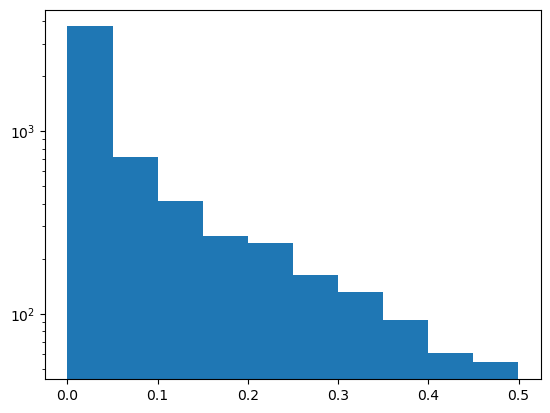

In [259]:
plt.hist(max_lam,log=True)

(array([4936.,  719.,  437.,  257.,  131.,  125.,   82.,   54.,   61.,
          67.]),
 array([0.        , 0.10000001, 0.20000001, 0.30000002, 0.40000003,
        0.50000004, 0.60000004, 0.70000005, 0.80000006, 0.90000006,
        1.00000007]),
 <BarContainer object of 10 artists>)

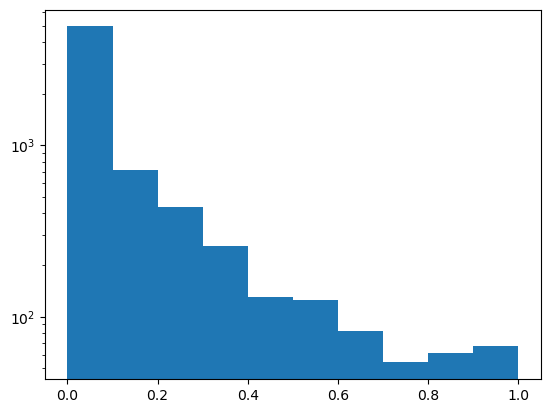

In [209]:
plt.hist(max_lam,log=True)

In [230]:
pairs.shape

(2, 6869)

In [231]:
overlap_pairs_flag.shape

(6869,)

In [195]:
max_lam = n.array(max_lam)

overlap_pairs_flag = (max_lam >= 0.5)

overlap_pairs = pairs[:,overlap_pairs_flag]

duplicate_cells = n.zeros(nc, dtype=bool)
for overlap_pair in overlap_pairs:
    op0, op1 = overlap_pair
    lamsum0 = lams[op0].sum()
    lamsum1 = lams[op1].sum()
    if lamsum0 > lamsum1:
        duplicate_cells[op1] = True
    else:
        duplicate_cells[op0] = True